## result after offset_correction

In [7]:
import os
import re
import pandas as pd
filename='/Users/chenglinlin/ownCloud/BETA_AI_Gaze_Estimation_in_Human-Robot_Interaction (Projectfolder)/analized_data/analysis_dataset_calibration_crossvalidation.csv'
df=pd.read_csv(filename)
df=df[(df['corrResp']==True)&(df['error_eth_cal']<30)&(df['error_l2cs_cal']<30)&(df['error_eth']<30)&(df['error_l2cs']<30)]
#df=df[df['person_ID'].isin(['4','12','13','14','15','18','19','20','21'])]
df=df[df['person_ID'].isin(['12','13','13','14','15','18','19'])]

In [8]:
d=[1,2,3,4,5,6,7,8,9]
d1=[1,2,3]
d2=[4,6,6]
d3=[7,8,9]
d23=[4,5,6,7,8,9]


dno4k=df[(df['pos_number'].isin(d2))&(df['4k']==False)][['error_l2cs_cal','error_eth_cal','error_l2cs','error_eth','person_ID','Dot_xy']].groupby(['person_ID','Dot_xy']).mean().groupby(['person_ID']).mean()
d4k=df[(df['pos_number'].isin(d2))&(df['4k']==True)][['error_l2cs_cal','error_eth_cal','error_l2cs','error_eth','person_ID','Dot_xy']].groupby(['person_ID','Dot_xy']).mean().groupby(['person_ID']).mean()
print(dno4k.mean(),d4k.mean())

error_l2cs_cal     6.769282
error_eth_cal     10.135625
error_l2cs         8.309738
error_eth         11.091661
dtype: float64 error_l2cs_cal    6.042165
error_eth_cal     7.622354
error_l2cs        7.482051
error_eth         9.925341
dtype: float64


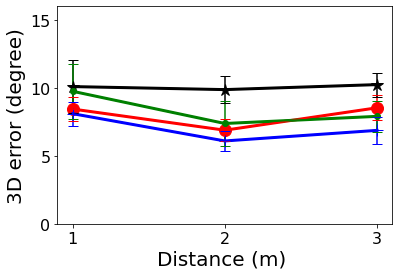

In [12]:

import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['font.size'] = 16
m_eth_no4k=[]
m_eth_4k=[]
m_l2cs_no4k=[]
m_l2cs_4k=[]

t1=[]
t2=[]
t3=[]
t4=[]




#figure(figsize=(18, 16), dpi=80)
for p in [1,4,7]:
    a=df[(df['pos_number'].isin([p,p+1,p+2]))&(df['4k']==False)][['error_eth_cal','person_ID']].groupby(['person_ID']).mean()
    b=df[(df['pos_number'].isin([p,p+1,p+2]))&(df['4k']==True)][['error_eth_cal','person_ID']].groupby(['person_ID']).mean()
    c=df[(df['pos_number'].isin([p,p+1,p+2]))&(df['4k']==False)][['error_l2cs_cal','person_ID']].groupby(['person_ID']).mean()
    d=df[(df['pos_number'].isin([p,p+1,p+2]))&(df['4k']==True)][['error_l2cs_cal','person_ID']].groupby(['person_ID']).mean()
    m_eth_no4k.append(a.mean()[0])
    m_eth_4k.append(b.mean()[0])
    m_l2cs_no4k.append(c.mean()[0])
    m_l2cs_4k.append(d.mean()[0])
    
    m_eth_no4k.append(a.sem()[0])
    m_eth_4k.append(b.sem()[0])
    m_l2cs_no4k.append(c.sem()[0])
    m_l2cs_4k.append(d.sem()[0])
    
    if p==7:
        t1=a
        t2=b
        t3=c
        t4=d
    
    
px=[1,2,3]

plt.plot(px,np.array(m_l2cs_no4k)[[0,2,4]],'ro-',linewidth=3, markersize=12,label = 'L2CS_no4k')

plt.plot(px,np.array(m_l2cs_4k)[[0,2,4]],'b+-',linewidth=3, markersize=12,label = 'L2CS_4k')

plt.plot(px,np.array(m_eth_no4k)[[0,2,4]],'k*-',linewidth=3, markersize=12,label = 'ETH_no4k')

plt.plot(px,np.array(m_eth_4k)[[0,2,4]],'g.-',linewidth=3, markersize=12,label = 'ETH_4k')
plt.xticks(px)
#plt.legend()

plt.ylim((0,16))

plt.errorbar(px,np.array(m_l2cs_no4k)[[0,2,4]],yerr = np.array(m_l2cs_no4k)[[1,3,5]],fmt ='r',capsize=5)
plt.errorbar(px,np.array(m_l2cs_4k)[[0,2,4]],yerr = np.array(m_l2cs_4k)[[1,3,5]],fmt ='b',capsize=5)
plt.errorbar(px,np.array(m_eth_no4k)[[0,2,4]],yerr = np.array(m_eth_no4k)[[1,3,5]],fmt ='k',capsize=5)
plt.errorbar(px,np.array(m_eth_4k)[[0,2,4]],yerr = np.array(m_eth_4k)[[1,3,5]],fmt ='g',capsize=5)



# pxx=[2,3]
# plt.errorbar(pxx,np.array(m_l2cs_no4k)[[2,4]],yerr = np.array(m_l2cs_no4k)[[3,5]],fmt ='r',capsize=5,lolims=True)

# plt.errorbar(pxx,np.array(m_l2cs_4k)[[2,4]],yerr = np.array(m_l2cs_4k)[[3,5]],fmt ='b',capsize=5,uplims=True)

# plt.errorbar(pxx,np.array(m_eth_no4k)[[2,4]],yerr = np.array(m_eth_no4k)[[3,5]],fmt ='k',capsize=5,lolims=True)

# plt.errorbar(pxx,np.array(m_eth_4k)[[2,4]],yerr = np.array(m_eth_4k)[[3,5]],fmt ='g',capsize=5,uplims=True)

# plt.errorbar(1,np.array(m_l2cs_no4k)[[0]],yerr = np.array(m_l2cs_no4k)[[1]],fmt ='r',capsize=5,uplims=True)
# plt.errorbar(1,np.array(m_l2cs_4k)[[0]],yerr = np.array(m_l2cs_4k)[[1]],fmt ='b',capsize=5,lolims=True)
# plt.errorbar(1,np.array(m_eth_no4k)[[0]],yerr = np.array(m_eth_no4k)[[1]],fmt ='k',capsize=5,uplims=True)
# plt.errorbar(1,np.array(m_eth_4k)[[0]],yerr = np.array(m_eth_4k)[[1]],fmt ='g',capsize=5,lolims=True)

plt.xlabel("Distance (m) ",fontsize=20)
plt.ylabel("3D error (degree)",fontsize=20)
#plt.title("gaze3d mean error of participants \n at 9 positions ",fontsize=20)

plt.show()



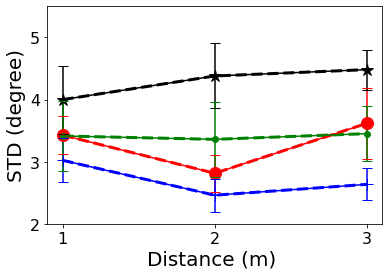

Ttest_relResult(statistic=2.785824679824311, pvalue=0.03863504990321832) 0.15842619501843014
Ttest_relResult(statistic=2.891717901523435, pvalue=0.03411839497074714) 0.18109043856034424
Ttest_relResult(statistic=0.9447210449222787, pvalue=0.3881799063037716) 0.14659508466932533
Ttest_relResult(statistic=0.793289393642034, pvalue=0.46357395528524625) 0.11548281421515205


In [15]:
m_eth_no4k=[]
m_eth_4k=[]
m_l2cs_no4k=[]
m_l2cs_4k=[]

t1=[]
t2=[]
t3=[]
t4=[]



from matplotlib.pyplot import figure

#figure(figsize=(18, 16), dpi=80)
for p in [1,4,7]:
    a=df[(df['pos_number'].isin([p,p+1,p+2]))&(df['4k']==False)][['error_eth_cal','person_ID','Dot_xy']].groupby(['person_ID','Dot_xy']).std().groupby(['person_ID']).mean()
    b=df[(df['pos_number'].isin([p,p+1,p+2]))&(df['4k']==True)][['error_eth_cal','person_ID','Dot_xy']].groupby(['person_ID','Dot_xy']).std().groupby(['person_ID']).mean()
    c=df[(df['pos_number'].isin([p,p+1,p+2]))&(df['4k']==False)][['error_l2cs_cal','person_ID','Dot_xy']].groupby(['person_ID','Dot_xy']).std().groupby(['person_ID']).mean()
    d=df[(df['pos_number'].isin([p,p+1,p+2]))&(df['4k']==True)][['error_l2cs_cal','person_ID','Dot_xy']].groupby(['person_ID','Dot_xy']).std().groupby(['person_ID']).mean()
    m_eth_no4k.append(a.mean()[0])
    m_eth_4k.append(b.mean()[0])
    m_l2cs_no4k.append(c.mean()[0])
    m_l2cs_4k.append(d.mean()[0])
    
    m_eth_no4k.append(a.sem()[0])
    m_eth_4k.append(b.sem()[0])
    m_l2cs_no4k.append(c.sem()[0])
    m_l2cs_4k.append(d.sem()[0])
    
    if p==7:
        t1=a
        t2=b
        t3=c
        t4=d
    
    
px=[1,2,3]

plt.plot(px,np.array(m_l2cs_no4k)[[0,2,4]],'ro--',linewidth=3, markersize=12,label = 'l2cs_no4k')

plt.plot(px,np.array(m_l2cs_4k)[[0,2,4]],'b+--',linewidth=3, markersize=12,label = 'l2cs_4k')

plt.plot(px,np.array(m_eth_no4k)[[0,2,4]],'k*--',linewidth=3, markersize=12,label = 'eth_no4k')

plt.plot(px,np.array(m_eth_4k)[[0,2,4]],'g.--',linewidth=3, markersize=12,label = 'eth_4k')
plt.xticks(px)
#plt.legend()

plt.ylim((2,5.5))

plt.errorbar(px,np.array(m_l2cs_no4k)[[0,2,4]],yerr = np.array(m_l2cs_no4k)[[1,3,5]],fmt ='r',capsize=5)
plt.errorbar(px,np.array(m_l2cs_4k)[[0,2,4]],yerr = np.array(m_l2cs_4k)[[1,3,5]],fmt ='b',capsize=5)
plt.errorbar(px,np.array(m_eth_no4k)[[0,2,4]],yerr = np.array(m_eth_no4k)[[1,3,5]],fmt ='k',capsize=5)
plt.errorbar(px,np.array(m_eth_4k)[[0,2,4]],yerr = np.array(m_eth_4k)[[1,3,5]],fmt ='g',capsize=5)



plt.xlabel("Distance (m) ",fontsize=20)
plt.ylabel("STD (degree)",fontsize=20)
#plt.title("gaze3d mean error of participants \n at 9 positions ",fontsize=20)
#plt.legend()

plt.show()


from scipy import stats
a=df[(df['4k']==False)][['error_eth','error_eth_cal','person_ID','Dot_xy']].groupby(['person_ID','Dot_xy']).mean().groupby(['person_ID']).mean()
b=df[(df['4k']==True)][['error_eth','error_eth_cal','person_ID','Dot_xy']].groupby(['person_ID','Dot_xy']).mean().groupby(['person_ID']).mean()
c=df[(df['4k']==False)][['error_l2cs','error_l2cs_cal','person_ID','Dot_xy']].groupby(['person_ID','Dot_xy']).mean().groupby(['person_ID']).mean()
d=df[(df['4k']==True)][['error_l2cs','error_l2cs_cal','person_ID','Dot_xy']].groupby(['person_ID','Dot_xy']).mean().groupby(['person_ID']).mean()
print(stats.ttest_rel(a['error_eth'],a['error_eth_cal']),(a['error_eth'].mean()-a['error_eth_cal'].mean())/a['error_eth'].mean())
print(stats.ttest_rel(b['error_eth'],b['error_eth_cal']),(b['error_eth'].mean()-b['error_eth_cal'].mean())/b['error_eth'].mean())
print(stats.ttest_rel(c['error_l2cs'],c['error_l2cs_cal']),(c['error_l2cs'].mean()-c['error_l2cs_cal'].mean())/c['error_l2cs'].mean())
print(stats.ttest_rel(d['error_l2cs'],d['error_l2cs_cal']),(d['error_l2cs'].mean()-d['error_l2cs_cal'].mean())/d['error_l2cs'].mean())

In [19]:
a=df[(df['4k']==False)][['error_eth','error_eth_cal','person_ID','Dot_xy']].groupby(['person_ID','Dot_xy']).std().groupby(['person_ID']).mean()
b=df[(df['4k']==True)][['error_eth','error_eth_cal','person_ID','Dot_xy']].groupby(['person_ID','Dot_xy']).std().groupby(['person_ID']).mean()
c=df[(df['4k']==False)][['error_l2cs','error_l2cs_cal','person_ID','Dot_xy']].groupby(['person_ID','Dot_xy']).std().groupby(['person_ID']).mean()
d=df[(df['4k']==True)][['error_l2cs','error_l2cs_cal','person_ID','Dot_xy']].groupby(['person_ID','Dot_xy']).std().groupby(['person_ID']).mean()
print(stats.ttest_rel(a['error_eth'],a['error_eth_cal']),(a['error_eth'].mean()-a['error_eth_cal'].mean())/a['error_eth'].mean())
print(stats.ttest_rel(b['error_eth'],b['error_eth_cal']),(b['error_eth'].mean()-b['error_eth_cal'].mean())/b['error_eth'].mean())
print(stats.ttest_rel(c['error_l2cs'],c['error_l2cs_cal']),(c['error_l2cs'].mean()-c['error_l2cs_cal'].mean())/c['error_l2cs'].mean())
print(stats.ttest_rel(d['error_l2cs'],d['error_l2cs_cal']),(d['error_l2cs'].mean()-d['error_l2cs_cal'].mean())/d['error_l2cs'].mean())

Ttest_relResult(statistic=1.684286928293704, pvalue=0.1306200495896107) 0.043620578159649634
Ttest_relResult(statistic=4.43012507576311, pvalue=0.0021966419521313933) 0.08890269417788994
Ttest_relResult(statistic=1.3221227579257275, pvalue=0.22267703693920726) 0.04850832027575352
Ttest_relResult(statistic=3.5705533678660766, pvalue=0.0072877981174304576) 0.16970696646927222


In [31]:
a=df[(df['4k']==False)][['error_eth','error_eth_cal','person_ID','Dot_xy']].groupby(['person_ID','Dot_xy']).mean().groupby(['person_ID']).mean()
b=df[(df['4k']==True)][['error_eth','error_eth_cal','person_ID','Dot_xy']].groupby(['person_ID','Dot_xy']).mean().groupby(['person_ID']).mean()
c=df[(df['4k']==False)][['error_l2cs','error_l2cs_cal','person_ID','Dot_xy']].groupby(['person_ID','Dot_xy']).mean().groupby(['person_ID']).mean()
d=df[(df['4k']==True)][['error_l2cs','error_l2cs_cal','person_ID','Dot_xy']].groupby(['person_ID','Dot_xy']).mean().groupby(['person_ID']).mean()



fr = pd.concat([a['error_eth'], b['error_eth'], c['error_l2cs'],d['error_l2cs']])
frcal = pd.concat([a['error_eth_cal'], b['error_eth_cal'], c['error_l2cs_cal'],d['error_l2cs_cal']])
stats.ttest_rel(fr,frcal)

stats.ttest_rel(b['error_eth_cal'], c['error_l2cs_cal'])

Ttest_relResult(statistic=-0.030431536062775773, pvalue=0.9764683955460702)

In [30]:
a=df[(df['4k']==False)][['error_eth','error_eth_cal','person_ID','Dot_xy']].groupby(['person_ID','Dot_xy']).std().groupby(['person_ID']).mean()
b=df[(df['4k']==True)][['error_eth','error_eth_cal','person_ID','Dot_xy']].groupby(['person_ID','Dot_xy']).std().groupby(['person_ID']).mean()
c=df[(df['4k']==False)][['error_l2cs','error_l2cs_cal','person_ID','Dot_xy']].groupby(['person_ID','Dot_xy']).std().groupby(['person_ID']).mean()
d=df[(df['4k']==True)][['error_l2cs','error_l2cs_cal','person_ID','Dot_xy']].groupby(['person_ID','Dot_xy']).std().groupby(['person_ID']).mean()



fr = pd.concat([a['error_eth'], b['error_eth'], c['error_l2cs'],d['error_l2cs']])
frcal = pd.concat([a['error_eth_cal'], b['error_eth_cal'], c['error_l2cs_cal'],d['error_l2cs_cal']])
stats.ttest_rel(fr,frcal)

stats.ttest_rel(b['error_eth_cal'], c['error_l2cs_cal'])

Ttest_relResult(statistic=5.434568860365258, pvalue=4.299063574191762e-06)

In [35]:
import math
math.atan(112/340)/3.14*180

18.24173886489826

## get offset

-2.3159159278853503

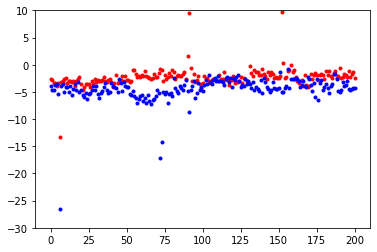

In [6]:

import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
import pandas as pd
f='/Users/chenglinlin/ownCloud/BETA_AI_Gaze_Estimation_in_Human-Robot_Interaction (Projectfolder)/processed_data/simple_calibration/result2/eth/no4k/pitch_yaw.csv'
#f='/Users/chenglinlin/ownCloud/BETA_AI_Gaze_Estimation_in_Human-Robot_Interaction (Projectfolder)/processed_data/simple_calibration/result2/l2cs/simple_calibration_4k.csv'
df=pd.read_csv(f)
df=df.dropna()/3.14*180
plt.plot(df['yaw'].iloc[:],'r.')
plt.plot(df['pitch'].iloc[:],'b.')
plt.ylim((-30, 10))
df['yaw'].iloc[0:200].mean()
#df['pitch'].iloc[750:758].mean()
#df['pitch'].iloc[100:600].mean()



## remove outliers by using Z-score method

In [2]:
max(1,2)

2

(array([7.220e+02, 1.946e+03, 3.027e+03, 3.720e+03, 3.966e+03, 4.043e+03,
        3.691e+03, 3.483e+03, 3.069e+03, 2.544e+03, 2.143e+03, 1.748e+03,
        1.309e+03, 1.050e+03, 8.900e+02, 6.750e+02, 5.050e+02, 4.460e+02,
        3.600e+02, 2.650e+02, 2.420e+02, 2.070e+02, 1.730e+02, 1.310e+02,
        1.270e+02, 8.800e+01, 6.000e+01, 5.900e+01, 7.500e+01, 4.000e+01,
        3.900e+01, 3.300e+01, 2.600e+01, 2.100e+01, 1.600e+01, 1.400e+01,
        1.000e+01, 8.000e+00, 1.000e+01, 4.000e+00, 7.000e+00, 5.000e+00,
        2.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([-1.50046542, -1.31056397, -1.12066251, -0.93076105, -0.7408596 ,
        -0.55095814, -0.36105668, -0.17115522,  0.01874623,  0.20864769,
         0.39854915,  0.5884506 ,  0.77835206,  0.96825352,  1.15815497,
         1.34805643,  1.53795789,  1.72785935,  1.9177608 ,  2.10766226,
         2.29756372,  2.48746517,  2.67736663,  2.86726809,  3.05716954,
         3.

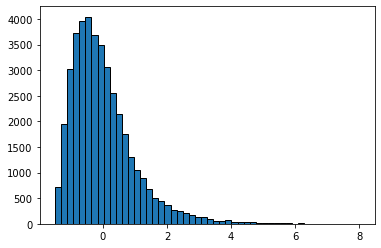

In [20]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
filename='/Users/chenglinlin/ownCloud/BETA_AI_Gaze_Estimation_in_Human-Robot_Interaction (Projectfolder)/analized_data/analysis_dataset_calibration.csv'
df=pd.read_csv(filename)


def maxt(row):
    row['error_max_cal']=max(row['error_eth_cal'],row['error_eth_cal'])
    return row    

df=df.apply(maxt,axis='columns')

df=df.drop(columns=['Unnamed: 0'])[df['corrResp']==True]['error_max_cal']


mean = df.mean()
std = df.std()
z = (df - mean) / std
threshold = 3
df_outliers = mean + 3 * std
df_outliers
# df = df[(z < threshold).all(axis=1)]
#plt.hist(z, bins=50, edgecolor='black')
plt.hist(z, bins=50, edgecolor='black')

(array([7.220e+02, 1.946e+03, 3.027e+03, 3.720e+03, 3.966e+03, 4.043e+03,
        3.691e+03, 3.483e+03, 3.069e+03, 2.544e+03, 2.143e+03, 1.748e+03,
        1.309e+03, 1.050e+03, 8.900e+02, 6.750e+02, 5.050e+02, 4.460e+02,
        3.600e+02, 2.650e+02, 2.420e+02, 2.070e+02, 1.730e+02, 1.310e+02,
        1.270e+02, 8.800e+01, 6.000e+01, 5.900e+01, 7.500e+01, 4.000e+01,
        3.900e+01, 3.300e+01, 2.600e+01, 2.100e+01, 1.600e+01, 1.400e+01,
        1.000e+01, 8.000e+00, 1.000e+01, 4.000e+00, 7.000e+00, 5.000e+00,
        2.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([ 0.08452463,  1.31434165,  2.54415867,  3.77397569,  5.00379271,
         6.23360974,  7.46342676,  8.69324378,  9.9230608 , 11.15287782,
        12.38269484, 13.61251187, 14.84232889, 16.07214591, 17.30196293,
        18.53177995, 19.76159697, 20.99141399, 22.22123102, 23.45104804,
        24.68086506, 25.91068208, 27.1404991 , 28.37031612, 29.60013315,
        30.

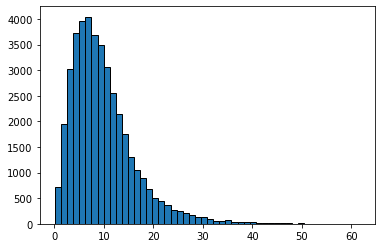

In [22]:
plt.hist(mean + z * std, bins=50, edgecolor='black')

## histogram
##A histogram is a graph used to represent the frequency distribution of a few data points of one variable. 
##Histograms often classify data into various “bins” or “range groups” and count how many data points belong to each of those bins.

Text(0, 0.5, 'Number of gaze points')

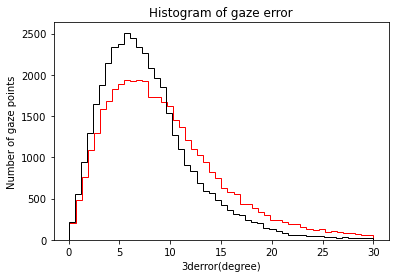

In [103]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
filename='/Users/chenglinlin/ownCloud/BETA_AI_Gaze_Estimation_in_Human-Robot_Interaction (Projectfolder)/analized_data/analysis_dataset_calibration.csv'
df=pd.read_csv(filename)


df=df.drop(columns=['Unnamed: 0'])[df['corrResp']==True]
dft=df[(df['error_eth_cal']<30)&(df['error_l2cs_cal']<30)]
plt.hist(dft['error_eth_cal'], bins=50, edgecolor='red',histtype='step')
plt.hist(dft['error_l2cs_cal'], bins=50, edgecolor='black',histtype='step')
plt.title("Histogram of gaze error")
plt.xlabel("3derror(degree)")
plt.ylabel("Number of gaze points")

In [63]:
dft

,dotNr,corrResp,Dot_xy,person_ID,height,glasses,pos_number,4k,3D_gaze,yp_gaze,...,3D_l2cs,3D_eth,error_l2cs,error_eth,error_l2cs_cal,virtual_l2cs_cal_x,virtual_l2cs_cal_y,error_eth_cal,virtual_eth_cal_x,virtual_eth_cal_y
0,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,"-0.035389508745978,0.0250979239550237,-0.99905...","-0.06775631068048,0.0474549457256149,-0.996572...",16.466574,14.719538,10.081558,17.075944,-27.950776,8.818457,10.875417,-26.083738
1,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,"-0.0168857260207708,0.0647039357544503,-0.9977...","-0.0430701889641975,0.0399948647586119,-0.9982...",14.747586,15.517128,8.909696,20.718797,-20.691217,9.817833,15.587078,-27.708050
2,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,"-0.0598439766919012,0.0478672022993367,-0.9970...","-0.0445743699709061,0.0283301320204229,-0.9986...",14.808984,16.129062,8.262106,12.427409,-23.496278,10.368792,15.272684,-29.872053
3,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,"-0.0608572966221589,0.0518564403369868,-0.9967...","-0.0751600376237983,0.0221928108590965,-0.9969...",14.572706,16.046542,8.032698,12.245006,-22.750778,10.036578,9.385154,-30.681863
4,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,"-0.0416299297497048,-0.1273866626833721,-0.990...","-0.014229976153416,-0.0248229020782096,-0.9995...",24.842595,19.565845,18.044230,15.456752,-57.171607,13.868283,21.161926,-40.306799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41719,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2016371072447534,0.2147862614877875,-0.95561...","0.2079510807656757,0.2164729784282918",...,"0.3128839086884055,0.0410703681234066,-0.94890...","0.1551278767870759,0.0966280516326878,-0.98315...",11.846554,7.449903,6.931259,110.295309,18.779060,2.959849,49.347895,32.533010
41720,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2016371072447534,0.2147862614877875,-0.95561...","0.2079510807656757,0.2164729784282918",...,"0.178466839266621,0.1341062128816164,-0.974764...","0.0713501695046382,0.0362373215095553,-0.99679...",4.934500,12.909238,2.739018,58.005319,52.398427,8.734219,18.191361,9.380573
41721,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2016371072447534,0.2147862614877875,-0.95561...","0.2079510807656757,0.2164729784282918",...,"0.2185106326479672,0.0944587088260668,-0.97125...","0.1598462611507892,0.0176962042587768,-0.98698...",7.023493,11.702861,0.746662,73.163398,37.647234,5.848494,51.386940,2.846515
41722,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2016371072447534,0.2147862614877875,-0.95561...","0.2079510807656757,0.2164729784282918",...,"0.1777083403054866,0.0641019820477972,-0.98199...","0.0522184396254252,-0.0254144063773432,-0.9983...",8.880281,16.447914,2.378070,57.795326,25.685026,11.684645,11.173187,-13.831924


In [93]:
x=df['Dot_xy'].str.split(',').iloc[0]
float(x[1].replace(']', ''))


def get_virtual(row):
    x=row['Dot_xy'].split(',')
    row['virtual_x']=float(x[0].replace('[', ''))*142/3840*2
    row['virtual_y']=float(x[1].replace(']', ''))*80/2160*2

    row['virtual_error_l2cs_cal']=(pow(pow((row['virtual_x']-row['virtual_l2cs_cal_x']),2)+pow((row['virtual_y']-row['virtual_l2cs_cal_y']),2),0.5))
    row['virtual_error_eth_cal']=(pow(pow(row['virtual_x']-row['virtual_eth_cal_x'],2)+pow(row['virtual_y']-row['virtual_eth_cal_y'],2),0.5))
    return row    

df=df.apply(get_virtual,axis='columns') 


df_original=df

df[df['Dot_xy']=='[460.80000000000007,-504.0]']
df.loc[df['Dot_xy']=='[460.80000000000007,-504.0]','Dot_xy']= '[460.8,-504.0]'
df.loc[df['Dot_xy']=='[460.80000000000007,0.0]','Dot_xy']= '[460.8,0.0]'
df.loc[df['Dot_xy']=='[460.80000000000007,504.0]','Dot_xy']= '[460.8,504.0]'
df

,dotNr,corrResp,Dot_xy,person_ID,height,glasses,pos_number,4k,3D_gaze,yp_gaze,...,error_l2cs_cal,virtual_l2cs_cal_x,virtual_l2cs_cal_y,error_eth_cal,virtual_eth_cal_x,virtual_eth_cal_y,virtual_x,virtual_y,virtual_error_l2cs_cal,virtual_error_eth_cal
0,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,10.081558,17.075944,-27.950776,8.818457,10.875417,-26.083738,0.00,0.000000,32.754141,28.260150
1,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,8.909696,20.718797,-20.691217,9.817833,15.587078,-27.708050,0.00,0.000000,29.281308,31.791399
2,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,8.262106,12.427409,-23.496278,10.368792,15.272684,-29.872053,0.00,0.000000,26.580361,33.549880
3,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,8.032698,12.245006,-22.750778,10.036578,9.385154,-30.681863,0.00,0.000000,25.836758,32.085165
4,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,18.044230,15.456752,-57.171607,13.868283,21.161926,-40.306799,0.00,0.000000,59.224183,45.524336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41719,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2016371072447534,0.2147862614877875,-0.95561...","0.2079510807656757,0.2164729784282918",...,6.931259,110.295309,18.779060,2.959849,49.347895,32.533010,68.16,37.333333,46.039606,19.414902
41720,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2016371072447534,0.2147862614877875,-0.95561...","0.2079510807656757,0.2164729784282918",...,2.739018,58.005319,52.398427,8.734219,18.191361,9.380573,68.16,37.333333,18.167955,57.255757
41721,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2016371072447534,0.2147862614877875,-0.95561...","0.2079510807656757,0.2164729784282918",...,0.746662,73.163398,37.647234,5.848494,51.386940,2.846515,68.16,37.333333,5.013235,38.349397
41722,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2016371072447534,0.2147862614877875,-0.95561...","0.2079510807656757,0.2164729784282918",...,2.378070,57.795326,25.685026,11.684645,11.173187,-13.831924,68.16,37.333333,15.591970,76.585772


,dotNr,corrResp,Dot_xy,person_ID,height,glasses,pos_number,4k,3D_gaze,yp_gaze,...,error_l2cs_cal,virtual_l2cs_cal_x,virtual_l2cs_cal_y,error_eth_cal,virtual_eth_cal_x,virtual_eth_cal_y,virtual_x,virtual_y,virtual_error_l2cs_cal,virtual_error_eth_cal
0,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,10.081558,17.075944,-27.950776,8.818457,10.875417,-26.083738,0.00,0.000000,32.754141,28.260150
1,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,8.909696,20.718797,-20.691217,9.817833,15.587078,-27.708050,0.00,0.000000,29.281308,31.791399
2,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,8.262106,12.427409,-23.496278,10.368792,15.272684,-29.872053,0.00,0.000000,26.580361,33.549880
3,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,8.032698,12.245006,-22.750778,10.036578,9.385154,-30.681863,0.00,0.000000,25.836758,32.085165
4,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,18.044230,15.456752,-57.171607,13.868283,21.161926,-40.306799,0.00,0.000000,59.224183,45.524336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41719,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2016371072447534,0.2147862614877875,-0.95561...","0.2079510807656757,0.2164729784282918",...,6.931259,110.295309,18.779060,2.959849,49.347895,32.533010,68.16,37.333333,46.039606,19.414902
41720,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2016371072447534,0.2147862614877875,-0.95561...","0.2079510807656757,0.2164729784282918",...,2.739018,58.005319,52.398427,8.734219,18.191361,9.380573,68.16,37.333333,18.167955,57.255757
41721,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2016371072447534,0.2147862614877875,-0.95561...","0.2079510807656757,0.2164729784282918",...,0.746662,73.163398,37.647234,5.848494,51.386940,2.846515,68.16,37.333333,5.013235,38.349397
41722,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2016371072447534,0.2147862614877875,-0.95561...","0.2079510807656757,0.2164729784282918",...,2.378070,57.795326,25.685026,11.684645,11.173187,-13.831924,68.16,37.333333,15.591970,76.585772


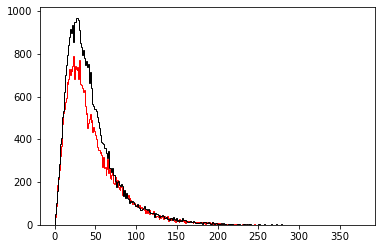

In [99]:
dft2=df[(df['error_eth_cal']<30)&(df['error_l2cs_cal']<30)]
plt.hist(dft2['virtual_error_eth_cal'], bins=300, edgecolor='red',histtype='step')
# plt.ylim((0, 6000))
# plt.show()
plt.hist(dft2['virtual_error_l2cs_cal'], bins=300, edgecolor='black',histtype='step')
# plt.ylim((0, 6000))
# plt.show()
dft2


In [92]:
dft2=df[(df['error_eth_cal']<30)&(df['error_l2cs_cal']<30)]
plt.hist(dft2['virtual_error_eth_cal'], bins=500, edgecolor='red',histtype='step')

plt.show()
plt.hist(dft2['virtual_error_l2cs_cal'], bins=500, edgecolor='black',histtype='step')

plt.show()
dft2

KeyError: 'virtual_error_eth_cal'

In [13]:
filename='/Users/chenglinlin/ownCloud/BETA_AI_Gaze_Estimation_in_Human-Robot_Interaction (Projectfolder)/analized_data/analysis_dataset_calibration.csv'
df=pd.read_csv(filename)
df=df.drop(columns=['Unnamed: 0'])[df['corrResp']==True]
dft = df[(df['error_eth_cal']<29.2)&(df['error_l2cs_cal']<29.2)]
dft

,dotNr,corrResp,Dot_xy,person_ID,height,glasses,pos_number,4k,3D_gaze,yp_gaze,...,3D_l2cs,3D_eth,error_l2cs,error_eth,error_l2cs_cal,virtual_l2cs_cal_x,virtual_l2cs_cal_y,error_eth_cal,virtual_eth_cal_x,virtual_eth_cal_y
0,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,"-0.035389508745978,0.0250979239550237,-0.99905...","-0.06775631068048,0.0474549457256149,-0.996572...",16.466574,14.719538,10.081558,17.075944,-27.950776,8.818457,10.875417,-26.083738
1,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,"-0.0168857260207708,0.0647039357544503,-0.9977...","-0.0430701889641975,0.0399948647586119,-0.9982...",14.747586,15.517128,8.909696,20.718797,-20.691217,9.817833,15.587078,-27.708050
2,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,"-0.0598439766919012,0.0478672022993367,-0.9970...","-0.0445743699709061,0.0283301320204229,-0.9986...",14.808984,16.129062,8.262106,12.427409,-23.496278,10.368792,15.272684,-29.872053
3,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,"-0.0608572966221589,0.0518564403369868,-0.9967...","-0.0751600376237983,0.0221928108590965,-0.9969...",14.572706,16.046542,8.032698,12.245006,-22.750778,10.036578,9.385154,-30.681863
4,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,"-0.0416299297497048,-0.1273866626833721,-0.990...","-0.014229976153416,-0.0248229020782096,-0.9995...",24.842595,19.565845,18.044230,15.456752,-57.171607,13.868283,21.161926,-40.306799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41719,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2016371072447534,0.2147862614877875,-0.95561...","0.2079510807656757,0.2164729784282918",...,"0.3128839086884055,0.0410703681234066,-0.94890...","0.1551278767870759,0.0966280516326878,-0.98315...",11.846554,7.449903,6.931259,110.295309,18.779060,2.959849,49.347895,32.533010
41720,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2016371072447534,0.2147862614877875,-0.95561...","0.2079510807656757,0.2164729784282918",...,"0.178466839266621,0.1341062128816164,-0.974764...","0.0713501695046382,0.0362373215095553,-0.99679...",4.934500,12.909238,2.739018,58.005319,52.398427,8.734219,18.191361,9.380573
41721,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2016371072447534,0.2147862614877875,-0.95561...","0.2079510807656757,0.2164729784282918",...,"0.2185106326479672,0.0944587088260668,-0.97125...","0.1598462611507892,0.0176962042587768,-0.98698...",7.023493,11.702861,0.746662,73.163398,37.647234,5.848494,51.386940,2.846515
41722,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2016371072447534,0.2147862614877875,-0.95561...","0.2079510807656757,0.2164729784282918",...,"0.1777083403054866,0.0641019820477972,-0.98199...","0.0522184396254252,-0.0254144063773432,-0.9983...",8.880281,16.447914,2.378070,57.795326,25.685026,11.684645,11.173187,-13.831924


In [19]:
(41007-39761)/(1350*31)

0.02977299880525687

In [3]:
import os
import re
import pandas as pd
filename='/Users/chenglinlin/ownCloud/BETA_AI_Gaze_Estimation_in_Human-Robot_Interaction (Projectfolder)/analized_data/analysis_dataset_calibration.csv'
df=pd.read_csv(filename)
df=df.drop(columns=['Unnamed: 0'])
df1=df[(df['4k']==True)&(df['corrResp']==True)&((df['error_eth_cal']<30)&(df['error_l2cs_cal']<30))] 
df[(df['person_ID']==21)&(df['4k']==False)&(df['corrResp']==True)&((df['error_eth_cal']>30)|(df['error_l2cs_cal']>30))]


,dotNr,corrResp,Dot_xy,person_ID,height,glasses,pos_number,4k,3D_gaze,yp_gaze,...,3D_l2cs,3D_eth,error_l2cs,error_eth,error_l2cs_cal,virtual_l2cs_cal_x,virtual_l2cs_cal_y,error_eth_cal,virtual_eth_cal_x,virtual_eth_cal_y
2700,12,True,"[0.0,-504.0]",21,177.0,True,1,False,"-0.117579303719211,0.1433644519244016,-0.98266...","-0.11908786306948,0.1438601541861548",...,"0.6763397433659349,0.1120378193188848,-0.72801...","0.1190932002119335,0.2693375060968468,-0.95565...",49.312386,15.486418,49.027160,293.435506,-21.523216,19.078127,48.227035,5.429172
2705,5,True,"[-921.6,0.0]",21,177.0,True,1,False,"-0.4855791957884448,0.2793752038916889,-0.8283...","-0.5302114620720781,0.2831433416430886",...,"-0.997332025574054,-0.057766941193692,0.044629...","-0.2713005937651441,0.0992018773875505,-0.9573...",64.457783,17.732646,62.285660,-518.817270,61.409400,14.767905,-27.442344,-21.491776
2706,5,True,"[-921.6,0.0]",21,177.0,True,1,False,"-0.4855791957884448,0.2793752038916889,-0.8283...","-0.5302114620720781,0.2831433416430886",...,"-0.9865537611452264,0.137684747916249,0.088060...","-0.1804643761183804,0.098960634331844,-0.97859...",63.604097,22.196824,62.090773,-451.748769,146.036141,19.807869,-10.723156,-23.908384
2708,5,True,"[-921.6,0.0]",21,177.0,True,1,False,"-0.4855791957884448,0.2793752038916889,-0.8283...","-0.5302114620720781,0.2831433416430886",...,"-0.997340033715638,-0.0265885296942759,-0.0678...","-0.3787935843356892,0.0971155122035313,-0.9203...",57.786420,13.231041,55.608027,-389.509318,43.234195,8.958394,-47.380723,-18.609514
2712,7,True,"[0.0,0.0]",21,177.0,True,1,False,"-0.1229736494017669,0.3351813806654395,-0.9340...","-0.1308974725045204,0.341797740592577",...,"0.3971862160191668,0.0331886092833698,-0.91713...","-0.0295207846725346,0.3454360984646808,-0.9379...",35.017853,5.393181,31.745924,131.278852,-47.262137,8.594628,18.463060,20.673553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3934,7,True,"[0.0,0.0]",21,177.0,True,9,False,"0.0222096368398944,0.1308589451897164,-0.99115...","0.0224041482974009,0.1312353256030364",...,"0.6332107077268647,0.1285517245874061,0.763229...","-0.061613120643559,0.1790502636190931,-0.98190...",136.518009,5.567288,44.518070,239.277143,9.235036,15.877483,7.808527,39.261352
3935,4,True,"[921.6,504.0]",21,177.0,True,9,False,"0.2026182617648759,0.2245853363449514,-0.95315...","0.2094581793369661,0.2265174811266491",...,"0.4352723598463985,0.1990709417079559,-0.87801...","-0.0892867565345035,0.2456081117393551,-0.9652...",14.119898,16.843132,42.210676,414.848515,90.877485,13.251073,1.341903,55.631269
3936,4,True,"[921.6,504.0]",21,177.0,True,9,False,"0.2026182617648759,0.2245853363449514,-0.95315...","0.2094581793369661,0.2265174811266491",...,"0.5533749667386388,0.0861873468842191,-0.82846...","-0.131066728673884,0.0926628830719736,-0.98703...",22.907656,20.763522,79.863424,3431.138435,157.898082,13.802336,-22.142245,10.366317
3938,4,True,"[921.6,504.0]",21,177.0,True,9,False,"0.2026182617648759,0.2245853363449514,-0.95315...","0.2094581793369661,0.2265174811266491",...,"0.3527205712031098,-0.0159039938182734,-0.9355...","-0.1337928450546691,0.0681411072626153,-0.9886...",16.329051,21.479914,55.264328,-425.856692,-0.165144,12.890946,-13.864777,21.073121


## video to images

In [4]:

import cv2
video='/Users/chenglinlin/ownCloud/BETA_AI_Gaze_Estimation_in_Human-Robot_Interaction (Projectfolder)/processed_data/predicted_gaze_l2cs/p2/baseline/p2_baseline.avi'
pictures='/Users/chenglinlin/ownCloud/BETA_AI_Gaze_Estimation_in_Human-Robot_Interaction (Projectfolder)/processed_data/predicted_gaze_l2cs/p2/baseline/picture/'
vidcap = cv2.VideoCapture(video)
success,image = vidcap.read()
count = 0
success = True
while success:
  success,image = vidcap.read()
  cv2.imwrite(pictures+"frame%d.jpg" % count, image)     # save frame as JPEG file
  if cv2.waitKey(10) == 27:                     # exit if Escape is hit
      break
  count += 1

error: OpenCV(4.6.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'


## images to video

In [18]:
# import cv2
# import os
# file='/Users/chenglinlin/ownCloud/BETA_AI_Gaze_Estimation_in_Human-Robot_Interaction (Projectfolder)/processed_data/predicted_gaze_l2cs/p2/baseline/'
# video=file+'clip.mp4'
# pictures=file+'pictures_clip' 
# fName = pictures+'/'+'*.jpg' 

# image_folder = pictures
# video_name = video

# images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]
# frame = cv2.imread(os.path.join(image_folder, images[0]))
# height, width, layers = frame.shape

# video = cv2.VideoWriter(video_name, 0, 1, (width,height))

# for image in images:
#     video.write(cv2.imread(os.path.join(image_folder, image)))

# cv2.destroyAllWindows()
# video.release()

In [ ]:
import cv2
vidcap = cv2.VideoCapture('Compton.mp4')
success,image = vidcap.read()
count = 0
success = True
while success:
  success,image = vidcap.read()
  cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file
  if cv2.waitKey(10) == 27:                     # exit if Escape is hit
      break
  count += 1

In [19]:

file='/Users/chenglinlin/ownCloud/BETA_AI_Gaze_Estimation_in_Human-Robot_Interaction (Projectfolder)/processed_data/predicted_gaze_l2cs/p2/baseline/'
video=file+'clip.mp4'
pictures=file+'pictures_clip' 
fName = pictures+'/'+'*.jpg' 
import ffmpeg

(
    ffmpeg
    .input(fName, pattern_type='glob', framerate=5)
    .output(video)
    .run()
)

(None, None)

In [21]:
file='/Users/chenglinlin/ownCloud/BETA_AI_Gaze_Estimation_in_Human-Robot_Interaction (Projectfolder)/processed_data/predicted_gaze_eth_baseline/p2/'
video=file+'clip_baseline.mp4'
pictures=file+'pictures_clip_baseline/' 
fName = pictures+'/'+'*.jpg' 
import ffmpeg

(
    ffmpeg
    .input(fName, pattern_type='glob', framerate=5)
    .output(video)
    .run()
)

(None, None)

## data cleaning

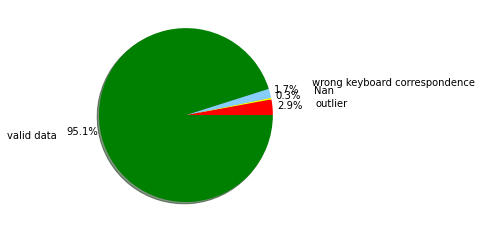

In [1]:
import matplotlib.pyplot as plt
import numpy as np
a=(41850-41724)
#y = np.array([ 41007-39857,41850-41724,41724-41007, 39857])
y = np.array([ 2.9,0.3,1.7, 95.2])
mylabels = [ 'outlier','Nan','wrong keyboard correspondence','valid data']
myexplode = [0, 0, 0, 0]
colors = ['red', 'yellow', 'lightskyblue','green']
plt.pie(y, labels = mylabels, explode = myexplode, shadow = True,autopct='%1.1f%%', pctdistance=1.2, labeldistance=1.5,colors=colors)
#plt.pie(sizes, labels=labels, autopct='%1.1f%%', pctdistance=1.2, labeldistance=1.5,colors=colors)
#plt.legend()
plt.show() 

## others not shown in the paper

## heatmap

In [12]:
import os
import re
import pandas as pd
filename='/Users/chenglinlin/ownCloud/BETA_AI_Gaze_Estimation_in_Human-Robot_Interaction (Projectfolder)/analized_data/analysis_dataset_calibration.csv'
df=pd.read_csv(filename)
df=df.drop(columns=['Unnamed: 0'])
df=df[(df['corrResp']==True)&(df['error_eth_cal']<30)&(df['error_l2cs_cal']<30)] 

,dotNr,corrResp,Dot_xy,person_ID,height,glasses,pos_number,4k,3D_gaze,yp_gaze,...,3D_l2cs,3D_eth,error_l2cs,error_eth,error_l2cs_cal,virtual_l2cs_cal_x,virtual_l2cs_cal_y,error_eth_cal,virtual_eth_cal_x,virtual_eth_cal_y
0,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,"-0.035389508745978,0.0250979239550237,-0.99905...","-0.06775631068048,0.0474549457256149,-0.996572...",16.466574,14.719538,10.081558,17.075944,-27.950776,8.818457,10.875417,-26.083738
1,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,"-0.0168857260207708,0.0647039357544503,-0.9977...","-0.0430701889641975,0.0399948647586119,-0.9982...",14.747586,15.517128,8.909696,20.718797,-20.691217,9.817833,15.587078,-27.708050
2,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,"-0.0598439766919012,0.0478672022993367,-0.9970...","-0.0445743699709061,0.0283301320204229,-0.9986...",14.808984,16.129062,8.262106,12.427409,-23.496278,10.368792,15.272684,-29.872053
3,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,"-0.0608572966221589,0.0518564403369868,-0.9967...","-0.0751600376237983,0.0221928108590965,-0.9969...",14.572706,16.046542,8.032698,12.245006,-22.750778,10.036578,9.385154,-30.681863
4,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,"-0.0416299297497048,-0.1273866626833721,-0.990...","-0.014229976153416,-0.0248229020782096,-0.9995...",24.842595,19.565845,18.044230,15.456752,-57.171607,13.868283,21.161926,-40.306799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41719,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2016371072447534,0.2147862614877875,-0.95561...","0.2079510807656757,0.2164729784282918",...,"0.3128839086884055,0.0410703681234066,-0.94890...","0.1551278767870759,0.0966280516326878,-0.98315...",11.846554,7.449903,6.931259,110.295309,18.779060,2.959849,49.347895,32.533010
41720,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2016371072447534,0.2147862614877875,-0.95561...","0.2079510807656757,0.2164729784282918",...,"0.178466839266621,0.1341062128816164,-0.974764...","0.0713501695046382,0.0362373215095553,-0.99679...",4.934500,12.909238,2.739018,58.005319,52.398427,8.734219,18.191361,9.380573
41721,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2016371072447534,0.2147862614877875,-0.95561...","0.2079510807656757,0.2164729784282918",...,"0.2185106326479672,0.0944587088260668,-0.97125...","0.1598462611507892,0.0176962042587768,-0.98698...",7.023493,11.702861,0.746662,73.163398,37.647234,5.848494,51.386940,2.846515
41722,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2016371072447534,0.2147862614877875,-0.95561...","0.2079510807656757,0.2164729784282918",...,"0.1777083403054866,0.0641019820477972,-0.98199...","0.0522184396254252,-0.0254144063773432,-0.9983...",8.880281,16.447914,2.378070,57.795326,25.685026,11.684645,11.173187,-13.831924


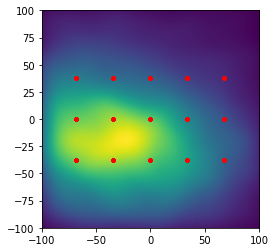

In [77]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

#df1=df[df['pos_number']==5][['virtual_l2cs_cal_x','virtual_l2cs_cal_y']]
df1=df[df['pos_number'].isin([7,8,9])][['virtual_eth_cal_x','virtual_eth_cal_y']]
df1=df1[abs(df1)<80]

df1=df1.dropna()
samples = df1.to_numpy()

kde = stats.kde.gaussian_kde(samples.T)

# Regular grid to evaluate kde upon
x_flat = np.r_[samples[:,0].min():samples[:,0].max():200j]
y_flat = np.r_[samples[:,1].min():samples[:,1].max():200j]
x,y = np.meshgrid(x_flat,y_flat)
grid_coords = np.append(x.reshape(-1,1),y.reshape(-1,1),axis=1)

z = kde(grid_coords.T)
z = z.reshape(200,200)

f='/Users/chenglinlin/ownCloud/BETA_AI_Gaze_Estimation_in_Human-Robot_Interaction (Projectfolder)/original_data/formal_experiment/p1_2022_11_14_17_35_52_78206780_Header.csv'
ideal=pd.read_csv(f)[['x','y']]
ix=ideal['x']*142/3840*2
iy=ideal['y']*80/2160*2
plt.imshow(z,aspect=x_flat.ptp()/y_flat.ptp(),extent=[-100,100,-100,100])
plt.plot(ix,iy,'r.')
plt.show()

## Gaze distribution on the screen dots for each human position and each camera.
## the dataset after offset correction and participant correction is wrong,need to be revised

In [9]:
import os
import re
import pandas as pd
filename='/Users/chenglinlin/ownCloud/BETA_AI_Gaze_Estimation_in_Human-Robot_Interaction (Projectfolder)/analized_data/analysis_dataset_newdotxy_calpre.csv'
df=pd.read_csv(filename)
df=df.drop(columns=['Unnamed: 0','3D_gaze','3D_l2cs','3D_eth','error_l2cs','error_eth','virtual_l2cs','virtual_eth'])
df=df[(df['corrResp']==True)&(df['error_eth_cal']<30)&(df['error_l2cs_cal']<30)] 

df=df[df['person_ID'].isin(['2','4','12','13','14','15','18','19','20','21'])]
df

,Unnamed: 0.1,dotNr,corrResp,Dot_xy,person_ID,height,glasses,pos_number,4k,yp_gaze,yp_l2cs,yp_eth,error_l2cs_cal,virtual_l2cs_cal_x,virtual_l2cs_cal_y,error_eth_cal,virtual_eth_cal_x,virtual_eth_cal_y
0,0,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1298932250135628,0.2970504172554897","-0.0354080582731485,0.0251005595901058","-0.06788486,0.047472775",10.736877,20.201257,-28.736390,9.086732,14.576522,-25.493199
1,1,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1298932250135628,0.2970504172554897","-0.0169219918824724,0.0647491692669875","-0.043118037,0.040005535",9.690567,23.855171,-21.424748,10.196997,19.350759,-27.108223
2,2,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1298932250135628,0.2970504172554897","-0.0599485550860106,0.0478855006123877","-0.04460706,0.0283339229999999",8.882554,15.479017,-24.258718,10.706528,19.044583,-29.285937
3,3,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1298932250135628,0.2970504172554897","-0.0609770678989992,0.0518797096152886","-0.07524955,0.022194633",8.658165,15.291214,-23.509024,10.198038,13.095365,-30.120840
4,4,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1298932250135628,0.2970504172554897","-0.0419842019528811,-0.1277337279956885","-0.014234843,-0.024825452",18.497899,18.696679,-58.172014,14.205471,25.065699,-39.764361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41719,41782,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2079510807656757,0.2164729784282918","0.3185060768902066,0.0410819229755623","0.1564952,0.096779056",8.815850,124.926467,21.339469,1.176008,75.044592,33.744785
41720,41783,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2079510807656757,0.2164729784282918","0.1810816383199378,0.1345114729699401","0.07145786,0.036245257",2.646559,71.994888,54.698143,5.539356,44.021049,10.186019
41721,41784,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2079510807656757,0.2164729784282918","0.2212937728834802,0.0945997429773586","0.16056027,0.017697128",2.896750,87.303295,40.026528,5.273343,77.332662,3.959019
41722,41785,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2079510807656757,0.2164729784282918","0.1790294063839227,0.0641459632800845","0.052259095,-0.025417143",1.551403,71.899783,27.888943,9.021794,37.224022,-13.019210


In [10]:
df[df['Dot_xy']=='[460.80000000000007,-504.0]']
df.loc[df['Dot_xy']=='[460.80000000000007,-504.0]','Dot_xy']= '[460.8,-504.0]'
df.loc[df['Dot_xy']=='[460.80000000000007,0.0]','Dot_xy']= '[460.8,0.0]'
df.loc[df['Dot_xy']=='[460.80000000000007,504.0]','Dot_xy']= '[460.8,504.0]'

In [11]:
df[['error_eth_cal','pos_number','Dot_xy']].groupby(['pos_number']).mean()
df

,Unnamed: 0.1,dotNr,corrResp,Dot_xy,person_ID,height,glasses,pos_number,4k,yp_gaze,yp_l2cs,yp_eth,error_l2cs_cal,virtual_l2cs_cal_x,virtual_l2cs_cal_y,error_eth_cal,virtual_eth_cal_x,virtual_eth_cal_y
0,0,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1298932250135628,0.2970504172554897","-0.0354080582731485,0.0251005595901058","-0.06788486,0.047472775",10.736877,20.201257,-28.736390,9.086732,14.576522,-25.493199
1,1,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1298932250135628,0.2970504172554897","-0.0169219918824724,0.0647491692669875","-0.043118037,0.040005535",9.690567,23.855171,-21.424748,10.196997,19.350759,-27.108223
2,2,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1298932250135628,0.2970504172554897","-0.0599485550860106,0.0478855006123877","-0.04460706,0.0283339229999999",8.882554,15.479017,-24.258718,10.706528,19.044583,-29.285937
3,3,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1298932250135628,0.2970504172554897","-0.0609770678989992,0.0518797096152886","-0.07524955,0.022194633",8.658165,15.291214,-23.509024,10.198038,13.095365,-30.120840
4,4,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1298932250135628,0.2970504172554897","-0.0419842019528811,-0.1277337279956885","-0.014234843,-0.024825452",18.497899,18.696679,-58.172014,14.205471,25.065699,-39.764361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41719,41782,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2079510807656757,0.2164729784282918","0.3185060768902066,0.0410819229755623","0.1564952,0.096779056",8.815850,124.926467,21.339469,1.176008,75.044592,33.744785
41720,41783,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2079510807656757,0.2164729784282918","0.1810816383199378,0.1345114729699401","0.07145786,0.036245257",2.646559,71.994888,54.698143,5.539356,44.021049,10.186019
41721,41784,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2079510807656757,0.2164729784282918","0.2212937728834802,0.0945997429773586","0.16056027,0.017697128",2.896750,87.303295,40.026528,5.273343,77.332662,3.959019
41722,41785,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2079510807656757,0.2164729784282918","0.1790294063839227,0.0641459632800845","0.052259095,-0.025417143",1.551403,71.899783,27.888943,9.021794,37.224022,-13.019210


In [12]:
x=df['Dot_xy'].str.split(',').iloc[0]
float(x[1].replace(']', ''))
def get_virtual(row):
    x=row['Dot_xy'].split(',')
    row['virtual_x']=float(x[0].replace('[', ''))*142/3840*2
    row['virtual_y']=float(x[1].replace(']', ''))*80/2160*2
    return row    

df=df.apply(get_virtual,axis='columns')

df

,Unnamed: 0.1,dotNr,corrResp,Dot_xy,person_ID,height,glasses,pos_number,4k,yp_gaze,yp_l2cs,yp_eth,error_l2cs_cal,virtual_l2cs_cal_x,virtual_l2cs_cal_y,error_eth_cal,virtual_eth_cal_x,virtual_eth_cal_y,virtual_x,virtual_y
0,0,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1298932250135628,0.2970504172554897","-0.0354080582731485,0.0251005595901058","-0.06788486,0.047472775",10.736877,20.201257,-28.736390,9.086732,14.576522,-25.493199,0.00,0.000000
1,1,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1298932250135628,0.2970504172554897","-0.0169219918824724,0.0647491692669875","-0.043118037,0.040005535",9.690567,23.855171,-21.424748,10.196997,19.350759,-27.108223,0.00,0.000000
2,2,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1298932250135628,0.2970504172554897","-0.0599485550860106,0.0478855006123877","-0.04460706,0.0283339229999999",8.882554,15.479017,-24.258718,10.706528,19.044583,-29.285937,0.00,0.000000
3,3,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1298932250135628,0.2970504172554897","-0.0609770678989992,0.0518797096152886","-0.07524955,0.022194633",8.658165,15.291214,-23.509024,10.198038,13.095365,-30.120840,0.00,0.000000
4,4,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1298932250135628,0.2970504172554897","-0.0419842019528811,-0.1277337279956885","-0.014234843,-0.024825452",18.497899,18.696679,-58.172014,14.205471,25.065699,-39.764361,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41719,41782,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2079510807656757,0.2164729784282918","0.3185060768902066,0.0410819229755623","0.1564952,0.096779056",8.815850,124.926467,21.339469,1.176008,75.044592,33.744785,68.16,37.333333
41720,41783,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2079510807656757,0.2164729784282918","0.1810816383199378,0.1345114729699401","0.07145786,0.036245257",2.646559,71.994888,54.698143,5.539356,44.021049,10.186019,68.16,37.333333
41721,41784,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2079510807656757,0.2164729784282918","0.2212937728834802,0.0945997429773586","0.16056027,0.017697128",2.896750,87.303295,40.026528,5.273343,77.332662,3.959019,68.16,37.333333
41722,41785,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2079510807656757,0.2164729784282918","0.1790294063839227,0.0641459632800845","0.052259095,-0.025417143",1.551403,71.899783,27.888943,9.021794,37.224022,-13.019210,68.16,37.333333


In [13]:
df['vxe_l2cs']=df['virtual_x']-df['virtual_l2cs_cal_x']
df['vye_l2cs']=df['virtual_y']-df['virtual_l2cs_cal_y']
df['vxe_eth']=df['virtual_x']-df['virtual_eth_cal_x']
df['vye_eth']=df['virtual_y']-df['virtual_eth_cal_y']

In [14]:
# df[['vxe_l2cs','pos_number']].groupby(['pos_number']).mean()

# x=df[['virtual_l2cs_cal_x','virtual_l2cs_cal_y','Dot_xy']].groupby(['Dot_xy']).mean()
# dfv=df[['vye_l2cs','pos_number','Dot_xy','vxe_l2cs']].groupby(['Dot_xy','pos_number']).mean()
# dfv_eth=df[['vye_eth','pos_number','Dot_xy','vxe_eth']].groupby(['Dot_xy','pos_number']).mean()
# dfv_eth_std=dfv_eth.groupby(['Dot_xy']).std()
# #df[['vye_l2cs','pos_number','Dot_xy','vxe_l2cs']].groupby(['Dot_xy']).std()

# dfv_std=dfv.groupby(['Dot_xy']).std()
# dfv


x_mean=df[df['pos_number']==2][['virtual_l2cs_cal_x','virtual_l2cs_cal_y','Dot_xy']].groupby(['Dot_xy']).mean()
x_error=df[df['pos_number']==2][['vxe_l2cs','vye_l2cs','Dot_xy','person_ID']].groupby(['Dot_xy','person_ID']).mean()
x_errorstd=df[df['pos_number']==2][['vxe_l2cs','vye_l2cs','Dot_xy','person_ID']].groupby(['Dot_xy','person_ID']).mean().groupby(['Dot_xy']).std()
x_mean
x_error
df

,Unnamed: 0.1,dotNr,corrResp,Dot_xy,person_ID,height,glasses,pos_number,4k,yp_gaze,...,virtual_l2cs_cal_y,error_eth_cal,virtual_eth_cal_x,virtual_eth_cal_y,virtual_x,virtual_y,vxe_l2cs,vye_l2cs,vxe_eth,vye_eth
0,0,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1298932250135628,0.2970504172554897",...,-28.736390,9.086732,14.576522,-25.493199,0.00,0.000000,-20.201257,28.736390,-14.576522,25.493199
1,1,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1298932250135628,0.2970504172554897",...,-21.424748,10.196997,19.350759,-27.108223,0.00,0.000000,-23.855171,21.424748,-19.350759,27.108223
2,2,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1298932250135628,0.2970504172554897",...,-24.258718,10.706528,19.044583,-29.285937,0.00,0.000000,-15.479017,24.258718,-19.044583,29.285937
3,3,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1298932250135628,0.2970504172554897",...,-23.509024,10.198038,13.095365,-30.120840,0.00,0.000000,-15.291214,23.509024,-13.095365,30.120840
4,4,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1298932250135628,0.2970504172554897",...,-58.172014,14.205471,25.065699,-39.764361,0.00,0.000000,-18.696679,58.172014,-25.065699,39.764361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41719,41782,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2079510807656757,0.2164729784282918",...,21.339469,1.176008,75.044592,33.744785,68.16,37.333333,-56.766467,15.993864,-6.884592,3.588549
41720,41783,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2079510807656757,0.2164729784282918",...,54.698143,5.539356,44.021049,10.186019,68.16,37.333333,-3.834888,-17.364810,24.138951,27.147314
41721,41784,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2079510807656757,0.2164729784282918",...,40.026528,5.273343,77.332662,3.959019,68.16,37.333333,-19.143295,-2.693194,-9.172662,33.374314
41722,41785,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2079510807656757,0.2164729784282918",...,27.888943,9.021794,37.224022,-13.019210,68.16,37.333333,-3.739783,9.444390,30.935978,50.352544


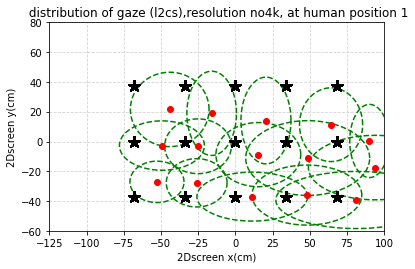

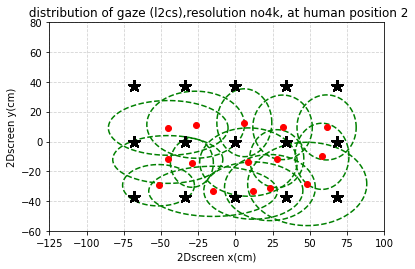

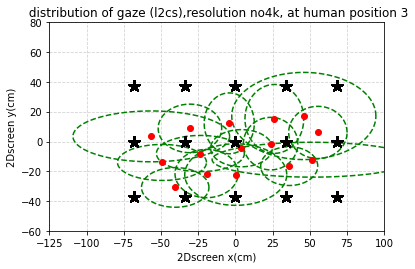

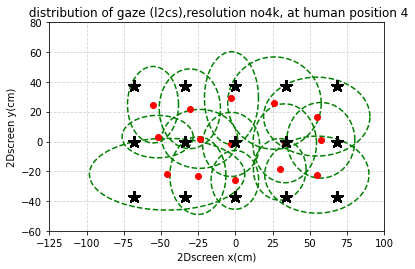

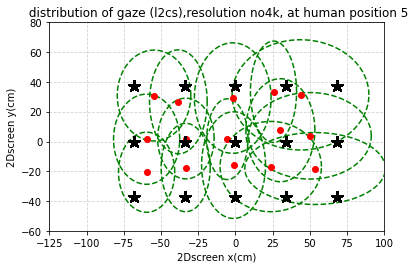

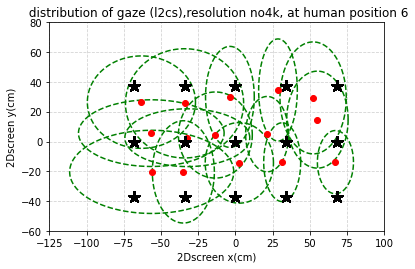

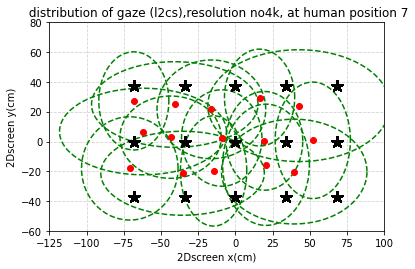

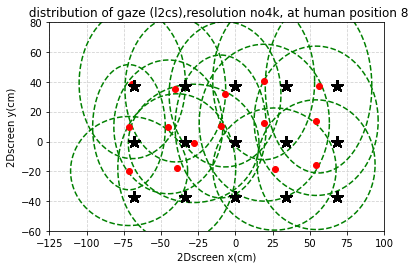

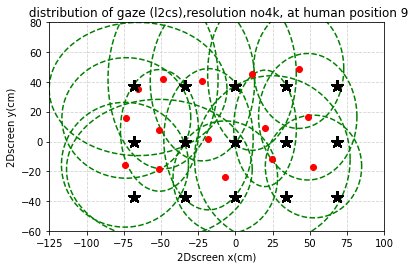

In [15]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi
f='/Users/chenglinlin/ownCloud/BETA_AI_Gaze_Estimation_in_Human-Robot_Interaction (Projectfolder)/original_data/formal_experiment/p1_2022_11_14_17_35_52_78206780_Header.csv'
ideal=pd.read_csv(f)[['x','y']]
ix=ideal['x']*142/3840*2
iy=ideal['y']*80/2160*2

for p in range(9):

    x_mean=df[(df['pos_number']==p+1)&(df['4k']==False)][['virtual_l2cs_cal_x','virtual_l2cs_cal_y','Dot_xy']].groupby(['Dot_xy']).mean()
    x_errorstd=df[(df['pos_number']==p+1)&(df['4k']==False)][['vxe_l2cs','vye_l2cs','Dot_xy','person_ID']].groupby(['Dot_xy','person_ID']).mean().groupby(['Dot_xy']).std()

    ax = plt.gca() #you first need to get the axis handle
    ax.set_aspect(1.0)
    for i in range(15):
        u=x_mean['virtual_l2cs_cal_x'].iloc[i]    #x-position of the center
        v=x_mean['virtual_l2cs_cal_y'].iloc[i]     #y-position of the center
        a=x_errorstd['vxe_l2cs'].iloc[i]      #radius on the x-axis
        b=x_errorstd['vye_l2cs'].iloc[i]     #radius on the y-axis

        t = np.linspace(0, 2*pi, 100)
        plt.plot( u+a*np.cos(t) , v+b*np.sin(t),'g--' )
        plt.grid(color='lightgray',linestyle='--')
    #plt.subplot(3, 3, 1+p)
    plt.plot(x_mean['virtual_l2cs_cal_x'],x_mean['virtual_l2cs_cal_y'],'ro')
    plt.plot(ix,iy,'k*',linewidth=3, markersize=12)
    plt.xlabel("2Dscreen x(cm)")
    plt.ylabel("2Dscreen y(cm)")
    pp=p+1
    plt.title(" distribution of gaze (l2cs),resolution no4k, at human position %i"%pp)
    plt.xlim((-125, 100))
    plt.ylim((-60, 80))
    plt.show()


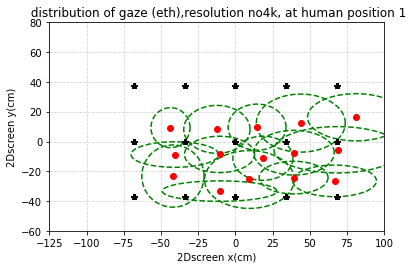

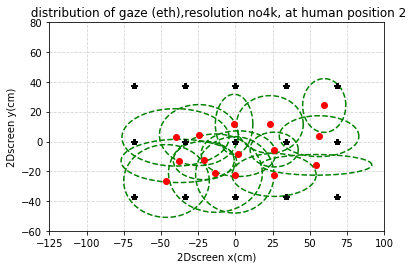

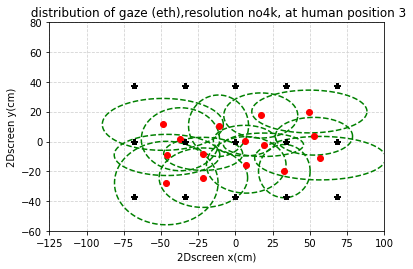

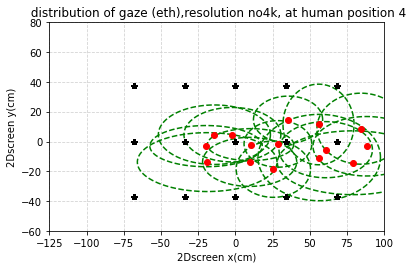

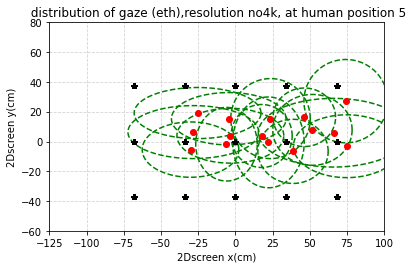

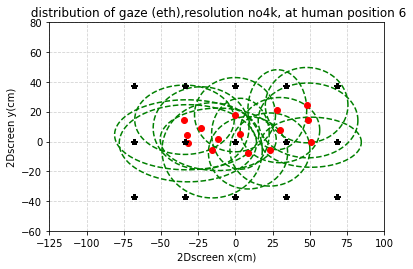

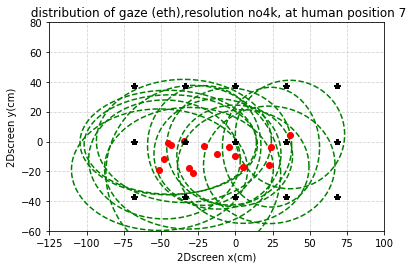

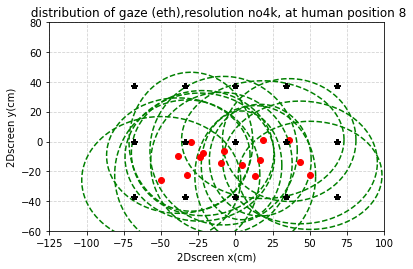

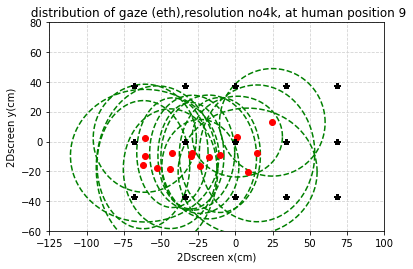

In [16]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi
for p in range(9):

    x_mean=df[(df['pos_number']==p+1)&(df['4k']==False)][['virtual_eth_cal_x','virtual_eth_cal_y','Dot_xy']].groupby(['Dot_xy']).mean()
    x_errorstd=df[(df['pos_number']==p+1)&(df['4k']==False)][['vxe_eth','vye_eth','Dot_xy','person_ID']].groupby(['Dot_xy','person_ID']).mean().groupby(['Dot_xy']).std()

    ax = plt.gca() #you first need to get the axis handle
    ax.set_aspect(1.0)
    for i in range(15):
        u=x_mean['virtual_eth_cal_x'].iloc[i]    #x-position of the center
        v=x_mean['virtual_eth_cal_y'].iloc[i]     #y-position of the center
        a=x_errorstd['vxe_eth'].iloc[i]      #radius on the x-axis
        b=x_errorstd['vye_eth'].iloc[i]     #radius on the y-axis

        t = np.linspace(0, 2*pi, 100)
        plt.plot( u+a*np.cos(t) , v+b*np.sin(t),'g--' )
        plt.grid(color='lightgray',linestyle='--')
    plt.plot(x_mean['virtual_eth_cal_x'],x_mean['virtual_eth_cal_y'],'ro')
    plt.plot(ix,iy,'k*')
    plt.xlabel("2Dscreen x(cm)")
    plt.ylabel("2Dscreen y(cm)")
    pp=p+1
    plt.title(" distribution of gaze (eth),resolution no4k, at human position %i"%pp)
    plt.xlim((-125, 100))
    plt.ylim((-60, 80))
    plt.show()


In [17]:
dfv_eth_std.mean()

NameError: name 'dfv_eth_std' is not defined

In [ ]:

d_l2cs_no4k=[]
std_l2cs_no4k=[]
for p in range(9):
    x_mean=df[(df['pos_number']==p+1)&(df['4k']==False)][['virtual_l2cs_cal_x','virtual_l2cs_cal_y','Dot_xy']].groupby(['Dot_xy']).mean()
    x_errorstd=df[(df['pos_number']==p+1)&(df['4k']==False)][['vxe_l2cs','vye_l2cs','Dot_xy','person_ID']].groupby(['Dot_xy','person_ID']).mean().groupby(['Dot_xy']).std()
    d=[]
    std=[]
    for i in range(15):
        d_x=float(x_mean['virtual_l2cs_cal_x'].index[i].split(',')[0].replace('[', ''))*142/3840*2-x_mean['virtual_l2cs_cal_x'].iloc[i]
        d_y=float(x_mean['virtual_l2cs_cal_y'].index[i].split(',')[1].replace(']', ''))*80/2160*2-x_mean['virtual_l2cs_cal_y'].iloc[i]
        d.append(pow(pow(d_x,2)+pow(d_y,2),0.5))
        std.append(pow(pow(x_errorstd['vxe_l2cs'].iloc[i],2)+pow(x_errorstd['vye_l2cs'].iloc[i],2),0.5))
    d_l2cs_no4k.append(pd.DataFrame(d).mean()[0])
    std_l2cs_no4k.append(pd.DataFrame(std).mean()[0])
    
d_l2cs_4k=[]
std_l2cs_4k=[]
for p in range(9):
    x_mean=df[(df['pos_number']==p+1)&(df['4k']==True)][['virtual_l2cs_cal_x','virtual_l2cs_cal_y','Dot_xy']].groupby(['Dot_xy']).mean()
    x_errorstd=df[(df['pos_number']==p+1)&(df['4k']==True)][['vxe_l2cs','vye_l2cs','Dot_xy','person_ID']].groupby(['Dot_xy','person_ID']).mean().groupby(['Dot_xy']).std()
    d=[]
    std=[]
    for i in range(15):
        d_x=float(x_mean['virtual_l2cs_cal_x'].index[i].split(',')[0].replace('[', ''))*142/3840*2-x_mean['virtual_l2cs_cal_x'].iloc[i]
        d_y=float(x_mean['virtual_l2cs_cal_y'].index[i].split(',')[1].replace(']', ''))*80/2160*2-x_mean['virtual_l2cs_cal_y'].iloc[i]
        d.append(pow(pow(d_x,2)+pow(d_y,2),0.5))
        std.append(pow(pow(x_errorstd['vxe_l2cs'].iloc[i],2)+pow(x_errorstd['vye_l2cs'].iloc[i],2),0.5))
    d_l2cs_4k.append(pd.DataFrame(d).mean()[0])
    std_l2cs_4k.append(pd.DataFrame(std).mean()[0])
d_l2cs_4k

In [ ]:
d_eth_4k=[]
std_eth_4k=[]
for p in range(9):
    x_mean=df[(df['pos_number']==p+1)&(df['4k']==True)][['virtual_eth_cal_x','virtual_eth_cal_y','Dot_xy']].groupby(['Dot_xy']).mean()
    x_errorstd=df[(df['pos_number']==p+1)&(df['4k']==True)][['vxe_eth','vye_eth','Dot_xy','person_ID']].groupby(['Dot_xy','person_ID']).mean().groupby(['Dot_xy']).std()
    d=[]
    std=[]
    for i in range(15):
        d_x=float(x_mean['virtual_eth_cal_x'].index[i].split(',')[0].replace('[', ''))*142/3840*2-x_mean['virtual_eth_cal_x'].iloc[i]
        d_y=float(x_mean['virtual_eth_cal_y'].index[i].split(',')[1].replace(']', ''))*80/2160*2-x_mean['virtual_eth_cal_y'].iloc[i]
        d.append(pow(pow(d_x,2)+pow(d_y,2),0.5))
        std.append(pow(pow(x_errorstd['vxe_eth'].iloc[i],2)+pow(x_errorstd['vye_eth'].iloc[i],2),0.5))
    d_eth_4k.append(pd.DataFrame(d).mean()[0])
    std_eth_4k.append(pd.DataFrame(std).mean()[0])

d_eth_no4k=[]
std_eth_no4k=[]

for p in range(9):
    x_mean=df[(df['pos_number']==p+1)&(df['4k']==False)][['virtual_eth_cal_x','virtual_eth_cal_y','Dot_xy']].groupby(['Dot_xy']).mean()
    x_errorstd=df[(df['pos_number']==p+1)&(df['4k']==False)][['vxe_eth','vye_eth','Dot_xy','person_ID']].groupby(['Dot_xy','person_ID']).mean().groupby(['Dot_xy']).std()
    d=[]
    std=[]
    for i in range(15):
        d_x=float(x_mean['virtual_eth_cal_x'].index[i].split(',')[0].replace('[', ''))*142/3840*2-x_mean['virtual_eth_cal_x'].iloc[i]
        d_y=float(x_mean['virtual_eth_cal_y'].index[i].split(',')[1].replace(']', ''))*80/2160*2-x_mean['virtual_eth_cal_y'].iloc[i]
        d.append(pow(pow(d_x,2)+pow(d_y,2),0.5))
        std.append(pow(pow(x_errorstd['vxe_eth'].iloc[i],2)+pow(x_errorstd['vye_eth'].iloc[i],2),0.5))
    d_eth_no4k.append(pd.DataFrame(d).mean()[0])
    std_eth_no4k.append(pd.DataFrame(std).mean()[0])
    
d_eth_no4k

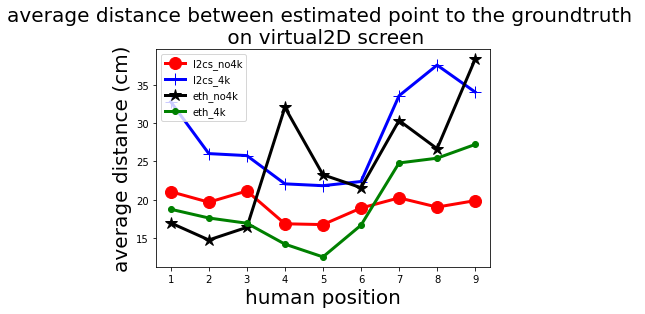

In [104]:
px=[1,2,3,4,5,6,7,8,9]
#plt.plot(px,d_l2cs_no4k,'ro-',px,d_l2cs_4k,'b+-',px,d_eth_no4k,'k*-',px,d_eth_4k,'g.-')
plt.plot(px,d_l2cs_no4k,'ro-',linewidth=3, markersize=12,label = 'l2cs_no4k')
plt.plot(px,d_l2cs_4k,'b+-',linewidth=3, markersize=12,label = 'l2cs_4k')
plt.plot(px,d_eth_no4k,'k*-',linewidth=3, markersize=12,label = 'eth_no4k')
plt.plot(px,d_eth_4k,'g.-',linewidth=3, markersize=12,label = 'eth_4k')
plt.xlabel("human position",fontsize=20)
plt.ylabel("average distance (cm)",fontsize=20)
plt.title("average distance between estimated point to the groundtruth \n on virtual2D screen",fontsize=20)
plt.legend()
plt.show()

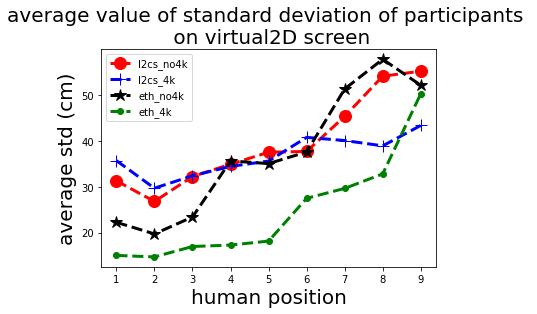

In [105]:
px=[1,2,3,4,5,6,7,8,9]
#plt.plot(px,d_l2cs_no4k,'ro-',px,d_l2cs_4k,'b+-',px,d_eth_no4k,'k*-',px,d_eth_4k,'g.-')
plt.plot(px,std_l2cs_no4k,'ro--',linewidth=3, markersize=12,label = 'l2cs_no4k')
plt.plot(px,std_l2cs_4k,'b+--',linewidth=3, markersize=12,label = 'l2cs_4k')
plt.plot(px,std_eth_no4k,'k*--',linewidth=3, markersize=12,label = 'eth_no4k')
plt.plot(px,std_eth_4k,'g.--',linewidth=3, markersize=12,label = 'eth_4k')
plt.xlabel("human position",fontsize=20)
plt.ylabel("average std (cm)",fontsize=20)
plt.title("average value of standard deviation of participants \n on virtual2D screen",fontsize=20)
plt.legend()
plt.show()

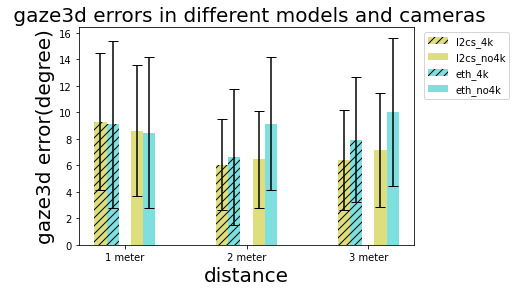

In [106]:
df_reso_4k1=df[(df['4k']==True)&(df['pos_number'].isin([1,2,3]))][['error_l2cs_cal','error_eth_cal']]
df_reso_4k2=df[(df['4k']==True)&(df['pos_number'].isin([4,5,6]))][['error_l2cs_cal','error_eth_cal']]
df_reso_4k3=df[(df['4k']==True)&(df['pos_number'].isin([7,8,9]))][['error_l2cs_cal','error_eth_cal']]
df_reso_no4k1=df[(df['4k']==False)&(df['pos_number'].isin([1,2,3]))][['error_l2cs_cal','error_eth_cal']]
df_reso_no4k2=df[(df['4k']==False)&(df['pos_number'].isin([4,5,6]))][['error_l2cs_cal','error_eth_cal']]
df_reso_no4k3=df[(df['4k']==False)&(df['pos_number'].isin([7,8,9]))][['error_l2cs_cal','error_eth_cal']]

X = ['1 meter','2 meter','3 meter']
Yl2cs = [df_reso_4k1['error_l2cs_cal'].mean(),df_reso_4k2['error_l2cs_cal'].mean(),df_reso_4k3['error_l2cs_cal'].mean()]
Zl2cs = [df_reso_no4k1['error_l2cs_cal'].mean(),df_reso_no4k2['error_l2cs_cal'].mean(),df_reso_no4k3['error_l2cs_cal'].mean()]
Yeth = [df_reso_4k1['error_eth_cal'].mean(),df_reso_4k2['error_eth_cal'].mean(),df_reso_4k3['error_eth_cal'].mean()]
Zeth = [df_reso_no4k1['error_eth_cal'].mean(),df_reso_no4k2['error_eth_cal'].mean(),df_reso_no4k3['error_eth_cal'].mean()]

sYl2cs = [df_reso_4k1['error_l2cs_cal'].std(),df_reso_4k2['error_l2cs_cal'].std(),df_reso_4k3['error_l2cs_cal'].std()]
sZl2cs = [df_reso_no4k1['error_l2cs_cal'].std(),df_reso_no4k2['error_l2cs_cal'].std(),df_reso_no4k3['error_l2cs_cal'].std()]
sYeth = [df_reso_4k1['error_eth_cal'].std(),df_reso_4k2['error_eth_cal'].std(),df_reso_4k3['error_eth_cal'].std()]
sZeth = [df_reso_no4k1['error_eth_cal'].std(),df_reso_no4k2['error_eth_cal'].std(),df_reso_no4k3['error_eth_cal'].std()]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Yl2cs, 0.1,yerr=sYl2cs,align='center', alpha=0.5, capsize=5,label = 'l2cs_4k', hatch='///',color='y')
plt.bar(X_axis + 0.1, Zl2cs, 0.1,yerr=sZl2cs,align='center', alpha=0.5, capsize=5, label = 'l2cs_no4k',color='y')
plt.bar(X_axis - 0.1, Yeth, 0.1, yerr=sYeth,align='center', alpha=0.5, capsize=5,label = 'eth_4k', hatch='///',color='c')
plt.bar(X_axis + 0.2, Zeth, 0.1,yerr=sZeth,align='center', alpha=0.5, capsize=5, label = 'eth_no4k',color='c')
  
plt.xticks(X_axis, X)
plt.xlabel("distance",fontsize=20)
plt.ylabel("gaze3d error(degree)",fontsize=20)
plt.title(" gaze3d errors in different models and cameras",fontsize=20)
#plt.legend()
plt.legend( fontsize=10,loc="upper right",bbox_to_anchor=(1.3, 1))
plt.show()

# std = [df3_d1['error_eth'].std(),df3_d2['error_eth'].std(),df3_d3['error_eth'].std()]
# plt.title('gaze3d mean error (degree) in different distances(eth)')
# plt.bar(name, data, yerr=std,align='center', alpha=0.5, ecolor='black', capsize=10)

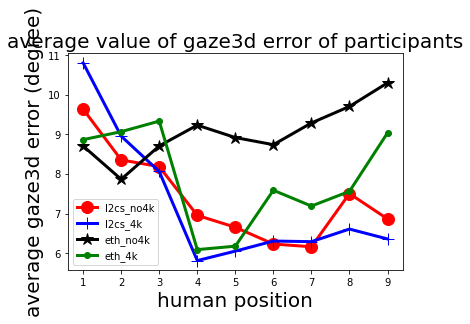

In [12]:
import numpy as np
from matplotlib import pyplot as plt
import os
import re
import pandas as pd
filename='/Users/chenglinlin/ownCloud/BETA_AI_Gaze_Estimation_in_Human-Robot_Interaction (Projectfolder)/analized_data/analysis_dataset_calibration_precise.csv'
df=pd.read_csv(filename)
df=df.drop(columns=['Unnamed: 0','3D_gaze','3D_l2cs','3D_eth','error_l2cs','error_eth','virtual_l2cs','virtual_eth'])
df=df[(df['corrResp']==True)&(df['error_eth_cal']<30)&(df['error_l2cs_cal']<30)] 

df=df[df['person_ID']!=21]
df
m_eth_no4k=[]
m_eth_4k=[]
m_l2cs_no4k=[]
m_l2cs_4k=[]
for p in range(9):
    a=df[(df['pos_number']==p+1)&(df['4k']==False)][['error_eth_cal','Dot_xy']].groupby(['Dot_xy']).mean()
    b=df[(df['pos_number']==p+1)&(df['4k']==True)][['error_eth_cal','Dot_xy']].groupby(['Dot_xy']).mean()
    c=df[(df['pos_number']==p+1)&(df['4k']==False)][['error_l2cs_cal','Dot_xy']].groupby(['Dot_xy']).mean()
    d=df[(df['pos_number']==p+1)&(df['4k']==True)][['error_l2cs_cal','Dot_xy']].groupby(['Dot_xy']).mean()
    m_eth_no4k.append(a.mean()[0])
    m_eth_4k.append(b.mean()[0])
    m_l2cs_no4k.append(c.mean()[0])
    m_l2cs_4k.append(d.mean()[0])
m_eth_no4k  
    
px=[1,2,3,4,5,6,7,8,9]

plt.plot(px,m_l2cs_no4k,'ro-',linewidth=3, markersize=12,label = 'l2cs_no4k')
plt.plot(px,m_l2cs_4k,'b+-',linewidth=3, markersize=12,label = 'l2cs_4k')
plt.plot(px,m_eth_no4k,'k*-',linewidth=3, markersize=12,label = 'eth_no4k')
plt.plot(px,m_eth_4k,'g.-',linewidth=3, markersize=12,label = 'eth_4k')
plt.xlabel("human position",fontsize=20)
plt.ylabel("average gaze3d error (degree)",fontsize=20)
plt.title("average value of gaze3d error of participants",fontsize=20)
plt.legend()
plt.show()

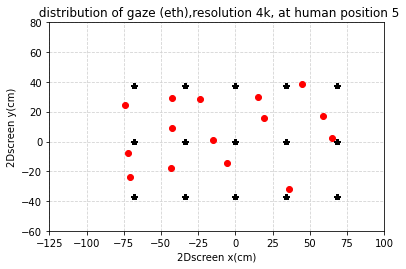

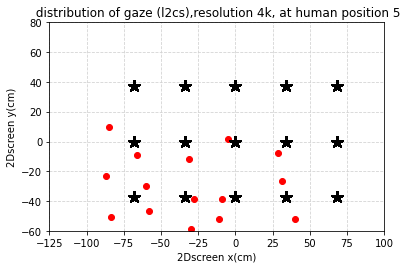

,dotNr,corrResp,Dot_xy,person_ID,height,glasses,pos_number,4k,yp_gaze,yp_l2cs,...,virtual_l2cs_cal_y,error_eth_cal,virtual_eth_cal_x,virtual_eth_cal_y,virtual_x,virtual_y,vxe_l2cs,vye_l2cs,vxe_eth,vye_eth
1350,6,True,"[-460.8,0.0]",2,160.0,True,1,False,"-0.3314188565737447,0.3011094284262386","-0.260238775400363,0.1215432100417993",...,-11.111643,18.156706,17.953963,-26.683062,-34.08,0.000000,-17.687126,11.111643,-52.033963,26.683062
1351,6,True,"[-460.8,0.0]",2,160.0,True,1,False,"-0.3314188565737447,0.3011094284262386","-0.325509391608788,0.1272391789812608",...,-9.034650,7.363414,-12.420506,-7.186663,-34.08,0.000000,-6.593384,9.034650,-21.659494,7.186663
1352,6,True,"[-460.8,0.0]",2,160.0,True,1,False,"-0.3314188565737447,0.3011094284262386","-0.3040104910769053,0.0988293754206225",...,-14.410371,13.907402,9.247299,-7.156490,-34.08,0.000000,-9.799985,14.410371,-43.327299,7.156490
1353,6,True,"[-460.8,0.0]",2,160.0,True,1,False,"-0.3314188565737447,0.3011094284262386","-0.3095959388311285,0.173662870471304",...,-1.177872,11.532816,-0.847975,-14.241298,-34.08,0.000000,-10.050138,1.177872,-33.232025,14.241298
1354,6,True,"[-460.8,0.0]",2,160.0,True,1,False,"-0.3314188565737447,0.3011094284262386","-0.3019366875360606,0.1836521214040822",...,0.449433,11.476862,-7.375743,-24.101029,-34.08,0.000000,-11.493726,-0.449433,-26.704257,24.101029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37669,4,True,"[921.6,504.0]",2,160.0,True,9,True,"0.2081055777503058,0.2173384001587754","0.1338584658706527,0.0998008965862834",...,37.292832,3.275949,47.294426,42.590750,68.16,37.333333,21.361506,0.040501,20.865574,-5.257417
37670,4,True,"[921.6,504.0]",2,160.0,True,9,True,"0.2081055777503058,0.2173384001587754","0.1178323613788829,0.1205775478305366",...,45.062858,2.830130,86.484862,41.989774,68.16,37.333333,27.375343,-7.729525,-18.324862,-4.656441
37671,4,True,"[921.6,504.0]",2,160.0,True,9,True,"0.2081055777503058,0.2173384001587754","0.0911711893899906,0.0653435868222932",...,24.065235,2.845610,65.973071,18.808681,68.16,37.333333,36.878873,13.268098,2.186929,18.524652
37672,4,True,"[921.6,504.0]",2,160.0,True,9,True,"0.2081055777503058,0.2173384001587754","0.1275180119473921,0.1220875601686115",...,45.697084,3.162541,74.185447,57.695558,68.16,37.333333,23.836223,-8.363751,-6.025447,-20.362225


In [57]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi

df=dft[dft['person_ID']==2]
p=0+4

x_mean=df[(df['pos_number']==p+1)&(df['4k']==True)][['virtual_eth_cal_x','virtual_eth_cal_y','Dot_xy']].groupby(['Dot_xy']).mean()
x_errorstd=df[(df['pos_number']==p+1)&(df['4k']==True)][['vxe_eth','vye_eth','Dot_xy','person_ID']].groupby(['Dot_xy','person_ID']).mean().groupby(['Dot_xy']).std()

ax = plt.gca() #you first need to get the axis handle
ax.set_aspect(1.0)
for i in range(15):
    u=x_mean['virtual_eth_cal_x'].iloc[i]    #x-position of the center
    v=x_mean['virtual_eth_cal_y'].iloc[i]     #y-position of the center
    a=x_errorstd['vxe_eth'].iloc[i]      #radius on the x-axis
    b=x_errorstd['vye_eth'].iloc[i]     #radius on the y-axis

    t = np.linspace(0, 2*pi, 100)
    plt.plot( u+a*np.cos(t) , v+b*np.sin(t),'g--' )
    plt.grid(color='lightgray',linestyle='--')
plt.plot(x_mean['virtual_eth_cal_x'],x_mean['virtual_eth_cal_y'],'ro')
plt.plot(ix,iy,'k*')
plt.xlabel("2Dscreen x(cm)")
plt.ylabel("2Dscreen y(cm)")
pp=p+1
plt.title(" distribution of gaze (eth),resolution 4k, at human position %i"%pp)
plt.xlim((-125, 100))
plt.ylim((-60, 80))
plt.show()

x_mean=df[(df['pos_number']==p+1)&(df['4k']==False)][['virtual_l2cs_cal_x','virtual_l2cs_cal_y','Dot_xy']].groupby(['Dot_xy']).mean()
x_errorstd=df[(df['pos_number']==p+1)&(df['4k']==False)][['vxe_l2cs','vye_l2cs','Dot_xy','person_ID']].groupby(['Dot_xy','person_ID']).mean().groupby(['Dot_xy']).std()

ax = plt.gca() #you first need to get the axis handle
ax.set_aspect(1.0)
for i in range(15):
    u=x_mean['virtual_l2cs_cal_x'].iloc[i]    #x-position of the center
    v=x_mean['virtual_l2cs_cal_y'].iloc[i]     #y-position of the center
    a=x_errorstd['vxe_l2cs'].iloc[i]      #radius on the x-axis
    b=x_errorstd['vye_l2cs'].iloc[i]     #radius on the y-axis

    t = np.linspace(0, 2*pi, 100)
    plt.plot( u+a*np.cos(t) , v+b*np.sin(t),'g--' )
    plt.grid(color='lightgray',linestyle='--')
#plt.subplot(3, 3, 1+p)
plt.plot(x_mean['virtual_l2cs_cal_x'],x_mean['virtual_l2cs_cal_y'],'ro')
plt.plot(ix,iy,'k*',linewidth=3, markersize=12)
plt.xlabel("2Dscreen x(cm)")
plt.ylabel("2Dscreen y(cm)")
pp=p+1
plt.title(" distribution of gaze (l2cs),resolution 4k, at human position %i"%pp)
plt.xlim((-125, 100))
plt.ylim((-60, 80))
plt.show()
df

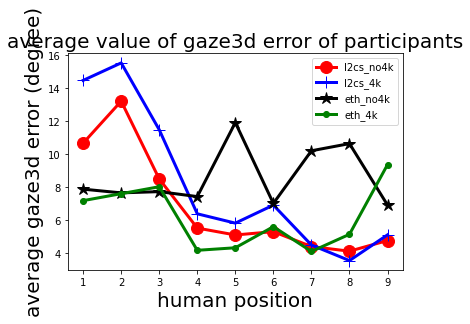

In [55]:
import numpy as np
from matplotlib import pyplot as plt
import os
import re
import pandas as pd
filename='/Users/chenglinlin/ownCloud/BETA_AI_Gaze_Estimation_in_Human-Robot_Interaction (Projectfolder)/analized_data/analysis_dataset_calibration_precise.csv'
df=pd.read_csv(filename)
df=df.drop(columns=['Unnamed: 0','3D_gaze','3D_l2cs','3D_eth','error_l2cs','error_eth','virtual_l2cs','virtual_eth'])
df=df[(df['corrResp']==True)&(df['error_eth_cal']<30)&(df['error_l2cs_cal']<30)] 

df=df[df['person_ID']==4]
df
m_eth_no4k=[]
m_eth_4k=[]
m_l2cs_no4k=[]
m_l2cs_4k=[]
for p in range(9):
    a=df[(df['pos_number']==p+1)&(df['4k']==False)][['error_eth_cal','Dot_xy']].groupby(['Dot_xy']).mean()
    b=df[(df['pos_number']==p+1)&(df['4k']==True)][['error_eth_cal','Dot_xy']].groupby(['Dot_xy']).mean()
    c=df[(df['pos_number']==p+1)&(df['4k']==False)][['error_l2cs_cal','Dot_xy']].groupby(['Dot_xy']).mean()
    d=df[(df['pos_number']==p+1)&(df['4k']==True)][['error_l2cs_cal','Dot_xy']].groupby(['Dot_xy']).mean()
    m_eth_no4k.append(a.mean()[0])
    m_eth_4k.append(b.mean()[0])
    m_l2cs_no4k.append(c.mean()[0])
    m_l2cs_4k.append(d.mean()[0])
m_eth_no4k  
    
px=[1,2,3,4,5,6,7,8,9]

plt.plot(px,m_l2cs_no4k,'ro-',linewidth=3, markersize=12,label = 'l2cs_no4k')
plt.plot(px,m_l2cs_4k,'b+-',linewidth=3, markersize=12,label = 'l2cs_4k')
plt.plot(px,m_eth_no4k,'k*-',linewidth=3, markersize=12,label = 'eth_no4k')
plt.plot(px,m_eth_4k,'g.-',linewidth=3, markersize=12,label = 'eth_4k')
plt.xlabel("human position",fontsize=20)
plt.ylabel("average gaze3d error (degree)",fontsize=20)
plt.title("average value of gaze3d error of participants",fontsize=20)
plt.legend()
plt.show()

In [53]:
dft=df
df=df[df['person_ID']==4]
dft

,dotNr,corrResp,Dot_xy,person_ID,height,glasses,pos_number,4k,yp_gaze,yp_l2cs,...,virtual_l2cs_cal_y,error_eth_cal,virtual_eth_cal_x,virtual_eth_cal_y,virtual_x,virtual_y,vxe_l2cs,vye_l2cs,vxe_eth,vye_eth
0,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1298932250135628,0.2970504172554897","-0.0354080582731485,0.0251005595901058",...,-28.736390,9.086732,14.576522,-25.493199,0.00,0.000000,-20.201257,28.736390,-14.576522,25.493199
1,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1298932250135628,0.2970504172554897","-0.0169219918824724,0.0647491692669875",...,-21.424748,10.196997,19.350759,-27.108223,0.00,0.000000,-23.855171,21.424748,-19.350759,27.108223
2,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1298932250135628,0.2970504172554897","-0.0599485550860106,0.0478855006123877",...,-24.258718,10.706528,19.044583,-29.285937,0.00,0.000000,-15.479017,24.258718,-19.044583,29.285937
3,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1298932250135628,0.2970504172554897","-0.0609770678989992,0.0518797096152886",...,-23.509024,10.198038,13.095365,-30.120840,0.00,0.000000,-15.291214,23.509024,-13.095365,30.120840
4,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1298932250135628,0.2970504172554897","-0.0419842019528811,-0.1277337279956885",...,-58.172014,14.205471,25.065699,-39.764361,0.00,0.000000,-18.696679,58.172014,-25.065699,39.764361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41719,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2079510807656757,0.2164729784282918","0.3185060768902066,0.0410819229755623",...,21.339469,1.176008,75.044592,33.744785,68.16,37.333333,-56.766467,15.993864,-6.884592,3.588549
41720,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2079510807656757,0.2164729784282918","0.1810816383199378,0.1345114729699401",...,54.698143,5.539356,44.021049,10.186019,68.16,37.333333,-3.834888,-17.364810,24.138951,27.147314
41721,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2079510807656757,0.2164729784282918","0.2212937728834802,0.0945997429773586",...,40.026528,5.273343,77.332662,3.959019,68.16,37.333333,-19.143295,-2.693194,-9.172662,33.374314
41722,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2079510807656757,0.2164729784282918","0.1790294063839227,0.0641459632800845",...,27.888943,9.021794,37.224022,-13.019210,68.16,37.333333,-3.739783,9.444390,30.935978,50.352544


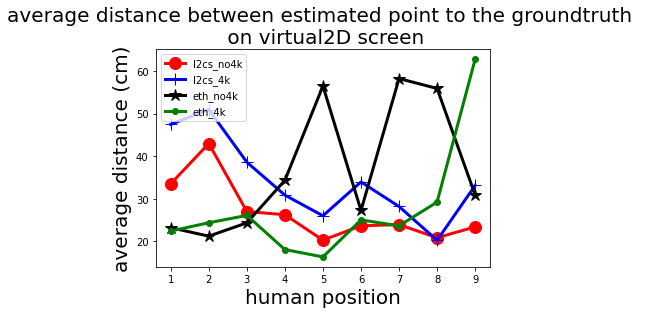

In [54]:
d_l2cs_no4k=[]
std_l2cs_no4k=[]
for p in range(9):
    x_mean=df[(df['pos_number']==p+1)&(df['4k']==False)][['virtual_l2cs_cal_x','virtual_l2cs_cal_y','Dot_xy']].groupby(['Dot_xy']).mean()
    x_errorstd=df[(df['pos_number']==p+1)&(df['4k']==False)][['vxe_l2cs','vye_l2cs','Dot_xy','person_ID']].groupby(['Dot_xy','person_ID']).mean().groupby(['Dot_xy']).std()
    d=[]
    std=[]
    for i in range(15):
        d_x=float(x_mean['virtual_l2cs_cal_x'].index[i].split(',')[0].replace('[', ''))*142/3840*2-x_mean['virtual_l2cs_cal_x'].iloc[i]
        d_y=float(x_mean['virtual_l2cs_cal_y'].index[i].split(',')[1].replace(']', ''))*80/2160*2-x_mean['virtual_l2cs_cal_y'].iloc[i]
        d.append(pow(pow(d_x,2)+pow(d_y,2),0.5))
        std.append(pow(pow(x_errorstd['vxe_l2cs'].iloc[i],2)+pow(x_errorstd['vye_l2cs'].iloc[i],2),0.5))
    d_l2cs_no4k.append(pd.DataFrame(d).mean()[0])
    std_l2cs_no4k.append(pd.DataFrame(std).mean()[0])
    
d_l2cs_4k=[]
std_l2cs_4k=[]
for p in range(9):
    x_mean=df[(df['pos_number']==p+1)&(df['4k']==True)][['virtual_l2cs_cal_x','virtual_l2cs_cal_y','Dot_xy']].groupby(['Dot_xy']).mean()
    x_errorstd=df[(df['pos_number']==p+1)&(df['4k']==True)][['vxe_l2cs','vye_l2cs','Dot_xy','person_ID']].groupby(['Dot_xy','person_ID']).mean().groupby(['Dot_xy']).std()
    d=[]
    std=[]
    for i in range(15):
        d_x=float(x_mean['virtual_l2cs_cal_x'].index[i].split(',')[0].replace('[', ''))*142/3840*2-x_mean['virtual_l2cs_cal_x'].iloc[i]
        d_y=float(x_mean['virtual_l2cs_cal_y'].index[i].split(',')[1].replace(']', ''))*80/2160*2-x_mean['virtual_l2cs_cal_y'].iloc[i]
        d.append(pow(pow(d_x,2)+pow(d_y,2),0.5))
        std.append(pow(pow(x_errorstd['vxe_l2cs'].iloc[i],2)+pow(x_errorstd['vye_l2cs'].iloc[i],2),0.5))
    d_l2cs_4k.append(pd.DataFrame(d).mean()[0])
    std_l2cs_4k.append(pd.DataFrame(std).mean()[0])
d_l2cs_4k

d_eth_4k=[]
std_eth_4k=[]
for p in range(9):
    x_mean=df[(df['pos_number']==p+1)&(df['4k']==True)][['virtual_eth_cal_x','virtual_eth_cal_y','Dot_xy']].groupby(['Dot_xy']).mean()
    x_errorstd=df[(df['pos_number']==p+1)&(df['4k']==True)][['vxe_eth','vye_eth','Dot_xy','person_ID']].groupby(['Dot_xy','person_ID']).mean().groupby(['Dot_xy']).std()
    d=[]
    std=[]
    for i in range(15):
        d_x=float(x_mean['virtual_eth_cal_x'].index[i].split(',')[0].replace('[', ''))*142/3840*2-x_mean['virtual_eth_cal_x'].iloc[i]
        d_y=float(x_mean['virtual_eth_cal_y'].index[i].split(',')[1].replace(']', ''))*80/2160*2-x_mean['virtual_eth_cal_y'].iloc[i]
        d.append(pow(pow(d_x,2)+pow(d_y,2),0.5))
        std.append(pow(pow(x_errorstd['vxe_eth'].iloc[i],2)+pow(x_errorstd['vye_eth'].iloc[i],2),0.5))
    d_eth_4k.append(pd.DataFrame(d).mean()[0])
    std_eth_4k.append(pd.DataFrame(std).mean()[0])

d_eth_no4k=[]
std_eth_no4k=[]

for p in range(9):
    x_mean=df[(df['pos_number']==p+1)&(df['4k']==False)][['virtual_eth_cal_x','virtual_eth_cal_y','Dot_xy']].groupby(['Dot_xy']).mean()
    x_errorstd=df[(df['pos_number']==p+1)&(df['4k']==False)][['vxe_eth','vye_eth','Dot_xy','person_ID']].groupby(['Dot_xy','person_ID']).mean().groupby(['Dot_xy']).std()
    d=[]
    std=[]
    for i in range(15):
        d_x=float(x_mean['virtual_eth_cal_x'].index[i].split(',')[0].replace('[', ''))*142/3840*2-x_mean['virtual_eth_cal_x'].iloc[i]
        d_y=float(x_mean['virtual_eth_cal_y'].index[i].split(',')[1].replace(']', ''))*80/2160*2-x_mean['virtual_eth_cal_y'].iloc[i]
        d.append(pow(pow(d_x,2)+pow(d_y,2),0.5))
        std.append(pow(pow(x_errorstd['vxe_eth'].iloc[i],2)+pow(x_errorstd['vye_eth'].iloc[i],2),0.5))
    d_eth_no4k.append(pd.DataFrame(d).mean()[0])
    std_eth_no4k.append(pd.DataFrame(std).mean()[0])
px=[1,2,3,4,5,6,7,8,9]
#plt.plot(px,d_l2cs_no4k,'ro-',px,d_l2cs_4k,'b+-',px,d_eth_no4k,'k*-',px,d_eth_4k,'g.-')
plt.plot(px,d_l2cs_no4k,'ro-',linewidth=3, markersize=12,label = 'l2cs_no4k')
plt.plot(px,d_l2cs_4k,'b+-',linewidth=3, markersize=12,label = 'l2cs_4k')
plt.plot(px,d_eth_no4k,'k*-',linewidth=3, markersize=12,label = 'eth_no4k')
plt.plot(px,d_eth_4k,'g.-',linewidth=3, markersize=12,label = 'eth_4k')
plt.xlabel("human position",fontsize=20)
plt.ylabel("average distance (cm)",fontsize=20)
plt.title("average distance between estimated point to the groundtruth \n on virtual2D screen",fontsize=20)
plt.legend()
plt.show()

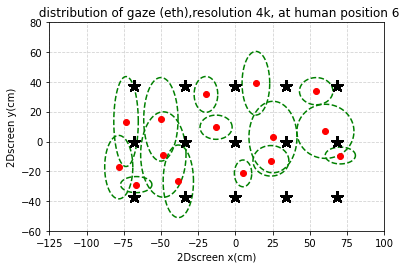

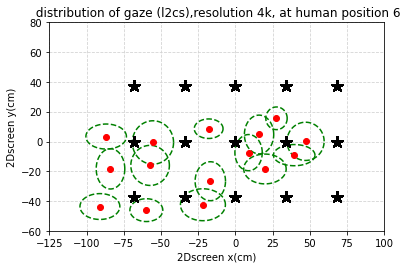

,dotNr,corrResp,Dot_xy,person_ID,height,glasses,pos_number,4k,yp_gaze,yp_l2cs,...,virtual_l2cs_cal_y,error_eth_cal,virtual_eth_cal_x,virtual_eth_cal_y,virtual_x,virtual_y,vxe_l2cs,vye_l2cs,vxe_eth,vye_eth
1350,6,True,"[-460.8,0.0]",2,160.0,True,1,False,"-0.3314188565737447,0.3011094284262386","-0.260238775400363,0.1215432100417993",...,-11.111643,18.156706,17.953963,-26.683062,-34.08,0.000000,-17.687126,11.111643,-52.033963,26.683062
1351,6,True,"[-460.8,0.0]",2,160.0,True,1,False,"-0.3314188565737447,0.3011094284262386","-0.325509391608788,0.1272391789812608",...,-9.034650,7.363414,-12.420506,-7.186663,-34.08,0.000000,-6.593384,9.034650,-21.659494,7.186663
1352,6,True,"[-460.8,0.0]",2,160.0,True,1,False,"-0.3314188565737447,0.3011094284262386","-0.3040104910769053,0.0988293754206225",...,-14.410371,13.907402,9.247299,-7.156490,-34.08,0.000000,-9.799985,14.410371,-43.327299,7.156490
1353,6,True,"[-460.8,0.0]",2,160.0,True,1,False,"-0.3314188565737447,0.3011094284262386","-0.3095959388311285,0.173662870471304",...,-1.177872,11.532816,-0.847975,-14.241298,-34.08,0.000000,-10.050138,1.177872,-33.232025,14.241298
1354,6,True,"[-460.8,0.0]",2,160.0,True,1,False,"-0.3314188565737447,0.3011094284262386","-0.3019366875360606,0.1836521214040822",...,0.449433,11.476862,-7.375743,-24.101029,-34.08,0.000000,-11.493726,-0.449433,-26.704257,24.101029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37669,4,True,"[921.6,504.0]",2,160.0,True,9,True,"0.2081055777503058,0.2173384001587754","0.1338584658706527,0.0998008965862834",...,37.292832,3.275949,47.294426,42.590750,68.16,37.333333,21.361506,0.040501,20.865574,-5.257417
37670,4,True,"[921.6,504.0]",2,160.0,True,9,True,"0.2081055777503058,0.2173384001587754","0.1178323613788829,0.1205775478305366",...,45.062858,2.830130,86.484862,41.989774,68.16,37.333333,27.375343,-7.729525,-18.324862,-4.656441
37671,4,True,"[921.6,504.0]",2,160.0,True,9,True,"0.2081055777503058,0.2173384001587754","0.0911711893899906,0.0653435868222932",...,24.065235,2.845610,65.973071,18.808681,68.16,37.333333,36.878873,13.268098,2.186929,18.524652
37672,4,True,"[921.6,504.0]",2,160.0,True,9,True,"0.2081055777503058,0.2173384001587754","0.1275180119473921,0.1220875601686115",...,45.697084,3.162541,74.185447,57.695558,68.16,37.333333,23.836223,-8.363751,-6.025447,-20.362225


In [60]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi

df=dft[dft['person_ID']==2]
p=0+5

x_mean=df[(df['pos_number']==p+1)&(df['4k']==True)][['virtual_eth_cal_x','virtual_eth_cal_y','Dot_xy']].groupby(['Dot_xy']).mean()
x_errorstd=df[(df['pos_number']==p+1)&(df['4k']==True)][['vxe_eth','vye_eth','Dot_xy']].groupby(['Dot_xy']).std()

ax = plt.gca() #you first need to get the axis handle
ax.set_aspect(1.0)
for i in range(15):
    u=x_mean['virtual_eth_cal_x'].iloc[i]    #x-position of the center
    v=x_mean['virtual_eth_cal_y'].iloc[i]     #y-position of the center
    a=x_errorstd['vxe_eth'].iloc[i]      #radius on the x-axis
    b=x_errorstd['vye_eth'].iloc[i]     #radius on the y-axis

    t = np.linspace(0, 2*pi, 100)
    plt.plot( u+a*np.cos(t) , v+b*np.sin(t),'g--' )
    plt.grid(color='lightgray',linestyle='--')
plt.plot(x_mean['virtual_eth_cal_x'],x_mean['virtual_eth_cal_y'],'ro')
plt.plot(ix,iy,'k*',linewidth=3, markersize=12)
plt.xlabel("2Dscreen x(cm)")
plt.ylabel("2Dscreen y(cm)")
pp=p+1
plt.title(" distribution of gaze (eth),resolution 4k, at human position %i"%pp)
plt.xlim((-125, 100))
plt.ylim((-60, 80))
plt.show()

x_mean=df[(df['pos_number']==p+1)&(df['4k']==False)][['virtual_l2cs_cal_x','virtual_l2cs_cal_y','Dot_xy']].groupby(['Dot_xy']).mean()
x_errorstd=df[(df['pos_number']==p+1)&(df['4k']==False)][['vxe_l2cs','vye_l2cs','Dot_xy']].groupby(['Dot_xy']).std()

ax = plt.gca() #you first need to get the axis handle
ax.set_aspect(1.0)
for i in range(15):
    u=x_mean['virtual_l2cs_cal_x'].iloc[i]    #x-position of the center
    v=x_mean['virtual_l2cs_cal_y'].iloc[i]     #y-position of the center
    a=x_errorstd['vxe_l2cs'].iloc[i]      #radius on the x-axis
    b=x_errorstd['vye_l2cs'].iloc[i]     #radius on the y-axis

    t = np.linspace(0, 2*pi, 100)
    plt.plot( u+a*np.cos(t) , v+b*np.sin(t),'g--' )
    plt.grid(color='lightgray',linestyle='--')
#plt.subplot(3, 3, 1+p)
plt.plot(x_mean['virtual_l2cs_cal_x'],x_mean['virtual_l2cs_cal_y'],'ro')
plt.plot(ix,iy,'k*',linewidth=3, markersize=12)
plt.xlabel("2Dscreen x(cm)")
plt.ylabel("2Dscreen y(cm)")
pp=p+1
plt.title(" distribution of gaze (l2cs),resolution 4k, at human position %i"%pp)
plt.xlim((-125, 100))
plt.ylim((-60, 80))
plt.show()
df

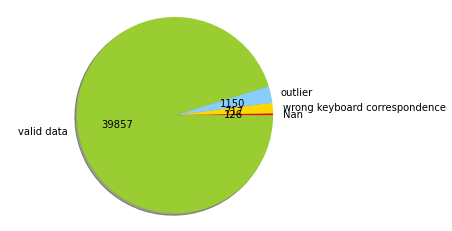

In [112]:
labels = 'Nan', 'wrong keyboard correspondence', 'outlier','valid data'
sizes = np.array([41850-41724, 41724-41007, 41007-39857,39857])
colors = ['red', 'gold', 'lightskyblue','yellowgreen']

p, tx, autotexts = plt.pie(sizes, labels=labels, colors=colors,
        autopct="", shadow=True)

for i, a in enumerate(autotexts):
    a.set_text("{}".format(sizes[i]))

plt.axis('equal')
plt.show()

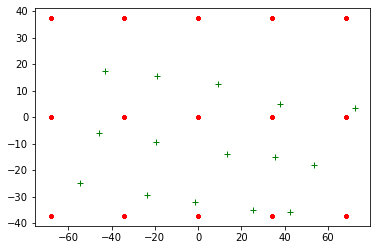

In [13]:
import scipy.stats as stats
from matplotlib import pyplot as plt
f='/Users/chenglinlin/ownCloud/BETA_AI_Gaze_Estimation_in_Human-Robot_Interaction (Projectfolder)/original_data/formal_experiment/p1_2022_11_14_17_35_52_78206780_Header.csv'
ideal=pd.read_csv(f)[['x','y']]
ix=ideal['x']*142/3840*2
iy=ideal['y']*80/2160*2
plt.plot(x1['virtual_l2cs_cal_x'],x1['virtual_l2cs_cal_y'],'g+')
plt.plot(ix,iy,'r.')

,virtual_eth_cal_x,virtual_eth_cal_y
Dot_xy,,
"[-460.8,-504.0]",-43.544574,-21.081290
"[-460.8,0.0]",-44.770666,-2.069428
"[-460.8,504.0]",-46.147309,17.529726
"[-921.6,-504.0]",-69.487814,-20.029968
"[-921.6,0.0]",-69.415130,-1.661350
"[-921.6,504.0]",-68.819333,18.409164
"[0.0,-504.0]",-14.994331,-19.980794
"[0.0,0.0]",-16.992072,-1.067157
"[0.0,504.0]",-18.742108,19.924081


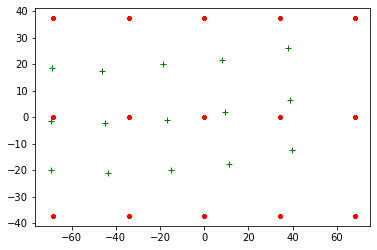

In [106]:
xeth=df[['virtual_eth_cal_x','virtual_eth_cal_y','Dot_xy']].groupby(['Dot_xy']).mean()
plt.plot(xeth['virtual_eth_cal_x'],xeth['virtual_eth_cal_y'],'g+')
plt.plot(ix,iy,'r.')
xeth

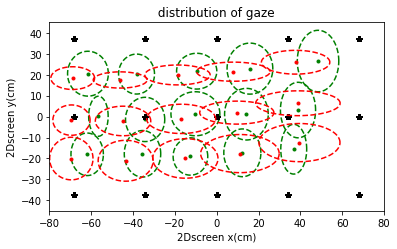

In [107]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect(1.0)
for i in range(15):
    u=x['virtual_l2cs_cal_x'].iloc[i]    #x-position of the center
    v=x['virtual_l2cs_cal_y'].iloc[i]     #y-position of the center
    a=dfv_std['vxe_l2cs'].iloc[i]      #radius on the x-axis
    b=dfv_std['vye_l2cs'].iloc[i]     #radius on the y-axis

    t = np.linspace(0, 2*pi, 100)
    plt.plot( u+a*np.cos(t) , v+b*np.sin(t),'g--' )
    plt.grid(color='lightgray',linestyle='--')
plt.plot(x['virtual_l2cs_cal_x'],x['virtual_l2cs_cal_y'],'g.')
plt.plot(ix,iy,'k*')
plt.xlabel("2Dscreen x(cm)")
plt.ylabel("2Dscreen y(cm)")
plt.title(" distribution of gaze (l2cs)")
plt.xlim((-80, 80))
plt.ylim((-45, 45))

for i in range(15):
    u=xeth['virtual_eth_cal_x'].iloc[i]    #x-position of the center
    v=xeth['virtual_eth_cal_y'].iloc[i]     #y-position of the center
    a=dfv_eth_std['vxe_eth'].iloc[i]      #radius on the x-axis
    b=dfv_eth_std['vye_eth'].iloc[i]     #radius on the y-axis

    t = np.linspace(0, 2*pi, 100)
    plt.plot( u+a*np.cos(t) , v+b*np.sin(t),'r--' )
    plt.grid(color='lightgray',linestyle='--')
plt.plot(xeth['virtual_eth_cal_x'],xeth['virtual_eth_cal_y'],'r.')

plt.xlabel("2Dscreen x(cm)")
plt.ylabel("2Dscreen y(cm)")
plt.title(" distribution of gaze ")
plt.xlim((-80, 80))
plt.ylim((-45, 45))

plt.show()


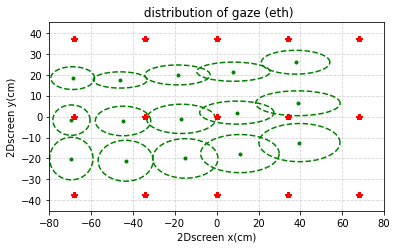

In [108]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect(1.0)
for i in range(15):
    u=xeth['virtual_eth_cal_x'].iloc[i]    #x-position of the center
    v=xeth['virtual_eth_cal_y'].iloc[i]     #y-position of the center
    a=dfv_eth_std['vxe_eth'].iloc[i]      #radius on the x-axis
    b=dfv_eth_std['vye_eth'].iloc[i]     #radius on the y-axis

    t = np.linspace(0, 2*pi, 100)
    plt.plot( u+a*np.cos(t) , v+b*np.sin(t),'g--' )
    plt.grid(color='lightgray',linestyle='--')
plt.plot(xeth['virtual_eth_cal_x'],xeth['virtual_eth_cal_y'],'g.')
plt.plot(ix,iy,'r*')
plt.xlabel("2Dscreen x(cm)")
plt.ylabel("2Dscreen y(cm)")
plt.title(" distribution of gaze (eth)")
plt.xlim((-80, 80))
plt.ylim((-45, 45))
plt.show()


## if there is a correlation between human_positions and predicted gaze accracy(l2cs and eth)

In [143]:
import os
import re
import pandas as pd
filename='/Users/chenglinlin/ownCloud/BETA_AI_Gaze_Estimation_in_Human-Robot_Interaction (Projectfolder)/analized_data/analysis_dataset_calibration.csv'
df=pd.read_csv(filename)
df=df.drop(columns=['Unnamed: 0'])
df=df[(df['corrResp']==True)&(df['error_eth_cal']<30)&(df['error_l2cs_cal']<30)] 
#df=df[df['person_ID']!=21]

In [144]:
df

,dotNr,corrResp,Dot_xy,person_ID,height,glasses,pos_number,4k,3D_gaze,yp_gaze,...,3D_l2cs,3D_eth,error_l2cs,error_eth,error_l2cs_cal,virtual_l2cs_cal_x,virtual_l2cs_cal_y,error_eth_cal,virtual_eth_cal_x,virtual_eth_cal_y
0,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,"-0.035389508745978,0.0250979239550237,-0.99905...","-0.06775631068048,0.0474549457256149,-0.996572...",16.466574,14.719538,10.081558,17.075944,-27.950776,8.818457,10.875417,-26.083738
1,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,"-0.0168857260207708,0.0647039357544503,-0.9977...","-0.0430701889641975,0.0399948647586119,-0.9982...",14.747586,15.517128,8.909696,20.718797,-20.691217,9.817833,15.587078,-27.708050
2,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,"-0.0598439766919012,0.0478672022993367,-0.9970...","-0.0445743699709061,0.0283301320204229,-0.9986...",14.808984,16.129062,8.262106,12.427409,-23.496278,10.368792,15.272684,-29.872053
3,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,"-0.0608572966221589,0.0518564403369868,-0.9967...","-0.0751600376237983,0.0221928108590965,-0.9969...",14.572706,16.046542,8.032698,12.245006,-22.750778,10.036578,9.385154,-30.681863
4,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,"-0.0416299297497048,-0.1273866626833721,-0.990...","-0.014229976153416,-0.0248229020782096,-0.9995...",24.842595,19.565845,18.044230,15.456752,-57.171607,13.868283,21.161926,-40.306799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41719,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2016371072447534,0.2147862614877875,-0.95561...","0.2079510807656757,0.2164729784282918",...,"0.3128839086884055,0.0410703681234066,-0.94890...","0.1551278767870759,0.0966280516326878,-0.98315...",11.846554,7.449903,6.931259,110.295309,18.779060,2.959849,49.347895,32.533010
41720,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2016371072447534,0.2147862614877875,-0.95561...","0.2079510807656757,0.2164729784282918",...,"0.178466839266621,0.1341062128816164,-0.974764...","0.0713501695046382,0.0362373215095553,-0.99679...",4.934500,12.909238,2.739018,58.005319,52.398427,8.734219,18.191361,9.380573
41721,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2016371072447534,0.2147862614877875,-0.95561...","0.2079510807656757,0.2164729784282918",...,"0.2185106326479672,0.0944587088260668,-0.97125...","0.1598462611507892,0.0176962042587768,-0.98698...",7.023493,11.702861,0.746662,73.163398,37.647234,5.848494,51.386940,2.846515
41722,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2016371072447534,0.2147862614877875,-0.95561...","0.2079510807656757,0.2164729784282918",...,"0.1777083403054866,0.0641019820477972,-0.98199...","0.0522184396254252,-0.0254144063773432,-0.9983...",8.880281,16.447914,2.378070,57.795326,25.685026,11.684645,11.173187,-13.831924


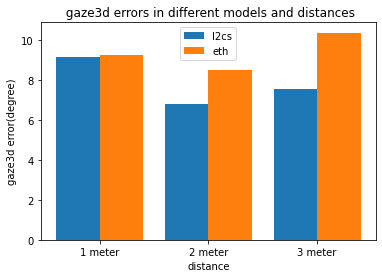

In [145]:
import csv
import re
import pandas as pd
import numpy as np
import pickle
from numpy.linalg import inv
import matplotlib.pyplot as plt
dfm=df[['pos_number','error_l2cs_cal','error_eth_cal']].groupby(['pos_number']).mean()
df_m_d1=df[df['pos_number'].isin([1,2,3])][['error_l2cs_cal','error_eth_cal']]
df_m_d2=df[df['pos_number'].isin([4,5,6])][['error_l2cs_cal','error_eth_cal']]
df_m_d3=df[df['pos_number'].isin([7,8,9])][['error_l2cs_cal','error_eth_cal']]

X = ['1 meter','2 meter','3 meter']
Yl2cs = [df_m_d1['error_l2cs_cal'].mean(),df_m_d2['error_l2cs_cal'].mean(),df_m_d3['error_l2cs_cal'].mean()]
Zeth = [df_m_d1['error_eth_cal'].mean(),df_m_d2['error_eth_cal'].mean(),df_m_d3['error_eth_cal'].mean()]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Yl2cs, 0.4, label = 'l2cs')
plt.bar(X_axis + 0.2, Zeth, 0.4, label = 'eth')
  
plt.xticks(X_axis, X)
plt.xlabel("distance")
plt.ylabel("gaze3d error(degree)")
plt.title(" gaze3d errors in different models and distances")
plt.legend()
plt.show()


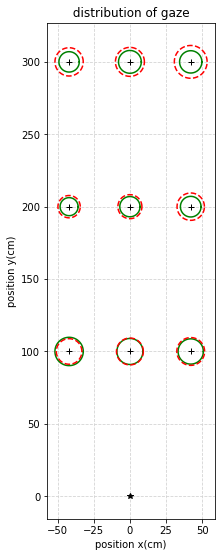

In [146]:
# plt.plot(dfm['error_l2cs_cal'],'g.')
# plt.plot(dfm['error_eth_cal'],'r.')
x=[-42,0,42,-42,0,42,-42,0,42]
y=[100,100,100,200,200,200,300,300,300]

 #fig size same as before
plt.figure(figsize=(3,12))   
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect(1.0)
for i in range(9):
    u=x[i]    #x-position of the center
    v=y[i]     #y-position of the center
    a1=dfm['error_l2cs_cal'].iloc[i]    #radius on the x-axis
    b1=a1     #radius on the y-axis
    a2=dfm['error_eth_cal'].iloc[i]      #radius on the x-axis
    b2=a2     #radius on the y-axis
    t = np.linspace(0, 2*3.1415926, 100)
    plt.plot( u+a1*np.cos(t) , v+b1*np.sin(t),'g' )
    plt.plot( u+a2*np.cos(t) , v+b2*np.sin(t),'r--' )
    plt.grid(color='lightgray',linestyle='--')


    
plt.plot(x,y,'k+')
plt.plot(0,0,'k*')
plt.xlabel("position x(cm)")
plt.ylabel("position y(cm)")
plt.title(" distribution of gaze ")

plt.show()


## 3d gaze error distribution on human positions (table)

In [148]:
import os
import re
import pandas as pd
filename='/Users/chenglinlin/ownCloud/BETA_AI_Gaze_Estimation_in_Human-Robot_Interaction (Projectfolder)/analized_data/analysis_dataset_calibration.csv'
df=pd.read_csv(filename)
df=df.drop(columns=['Unnamed: 0'])
df=df[(df['corrResp']==True)&(df['error_eth_cal']<30)&(df['error_l2cs_cal']<30)] 
#df=df[df['person_ID']!=21]

In [149]:
df.loc[df['pos_number'].isin([1,4,7]),'p_x']= -42
df.loc[df['pos_number'].isin([2,5,8]),'p_x']= 0
df.loc[df['pos_number'].isin([3,6,9]),'p_x']= 42
df.loc[df['pos_number'].isin([1,2,3]),'p_y']= 100
df.loc[df['pos_number'].isin([4,5,6]),'p_y']= 200
df.loc[df['pos_number'].isin([7,8,9]),'p_y']= 300

In [150]:
df

,dotNr,corrResp,Dot_xy,person_ID,height,glasses,pos_number,4k,3D_gaze,yp_gaze,...,error_l2cs,error_eth,error_l2cs_cal,virtual_l2cs_cal_x,virtual_l2cs_cal_y,error_eth_cal,virtual_eth_cal_x,virtual_eth_cal_y,p_x,p_y
0,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,16.466574,14.719538,10.081558,17.075944,-27.950776,8.818457,10.875417,-26.083738,-42.0,100.0
1,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,14.747586,15.517128,8.909696,20.718797,-20.691217,9.817833,15.587078,-27.708050,-42.0,100.0
2,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,14.808984,16.129062,8.262106,12.427409,-23.496278,10.368792,15.272684,-29.872053,-42.0,100.0
3,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,14.572706,16.046542,8.032698,12.245006,-22.750778,10.036578,9.385154,-30.681863,-42.0,100.0
4,7,True,"[0.0,0.0]",20,157.0,True,1,True,"-0.1238554470030273,0.2927010812060677,-0.9481...","-0.1298932250135628,0.2970504172554897",...,24.842595,19.565845,18.044230,15.456752,-57.171607,13.868283,21.161926,-40.306799,-42.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41719,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2016371072447534,0.2147862614877875,-0.95561...","0.2079510807656757,0.2164729784282918",...,11.846554,7.449903,6.931259,110.295309,18.779060,2.959849,49.347895,32.533010,42.0,300.0
41720,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2016371072447534,0.2147862614877875,-0.95561...","0.2079510807656757,0.2164729784282918",...,4.934500,12.909238,2.739018,58.005319,52.398427,8.734219,18.191361,9.380573,42.0,300.0
41721,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2016371072447534,0.2147862614877875,-0.95561...","0.2079510807656757,0.2164729784282918",...,7.023493,11.702861,0.746662,73.163398,37.647234,5.848494,51.386940,2.846515,42.0,300.0
41722,4,True,"[921.6,504.0]",18,151.0,True,9,False,"0.2016371072447534,0.2147862614877875,-0.95561...","0.2079510807656757,0.2164729784282918",...,8.880281,16.447914,2.378070,57.795326,25.685026,11.684645,11.173187,-13.831924,42.0,300.0


In [152]:
dft=df[['p_x','error_l2cs_cal','error_eth_cal']].groupby(['p_x']).mean()
dft

,error_l2cs_cal,error_eth_cal
p_x,,
-42.0,7.646956,8.760600
0.0,7.930712,9.182552
42.0,7.830934,10.126170


In [120]:
dfm=df[['p_y','error_l2cs_cal','error_eth_cal']].groupby(['p_y']).mean()
dfm


,error_l2cs_cal,error_eth_cal
p_y,,
100.0,8.901784,9.206185
200.0,6.605600,8.372181
300.0,7.345424,10.382421


## t-test(height, galsses, resolution,corresponse)

In [137]:
import os
import re
import pandas as pd
filename='/Users/chenglinlin/ownCloud/BETA_AI_Gaze_Estimation_in_Human-Robot_Interaction (Projectfolder)/analized_data/analysis_dataset_calibration.csv'
df=pd.read_csv(filename)
df=df.drop(columns=['Unnamed: 0'])
#df=df[(df['corrResp']==True)&(df['error_eth_cal']<30)&(df['error_l2cs_cal']<30)] 

In [138]:

df_4k=df[df['4k']==True]
df_no4k=df[(df['4k']==False)&(df['person_ID'].isin(['2','4','12','13','14','15','18','19','20','21']))]

In [141]:
df_no4k[df_no4k['person_ID']==20]

,dotNr,corrResp,Dot_xy,person_ID,height,glasses,pos_number,4k,3D_gaze,yp_gaze,...,3D_l2cs,3D_eth,error_l2cs,error_eth,error_l2cs_cal,virtual_l2cs_cal_x,virtual_l2cs_cal_y,error_eth_cal,virtual_eth_cal_x,virtual_eth_cal_y
37674,7,True,"[0.0,0.0]",20,157.0,True,1,False,"-0.1238962458055184,0.3062900358714396,-0.9438...","-0.130521837075987,0.3112933019851186",...,"0.0143348441005923,0.1000979693124017,-0.99487...","-0.0968933372144567,0.0490450643700208,-0.9940...",14.559682,15.141064,9.493215,26.860626,-17.350096,9.029658,5.246857,-28.383366
37675,7,True,"[0.0,0.0]",20,157.0,True,1,False,"-0.1238962458055184,0.3062900358714396,-0.9438...","-0.130521837075987,0.3112933019851186",...,"0.0315272687771773,0.0908184448349164,-0.99536...","0.005552572033817,0.1435375586572249,-0.989629...",15.553556,12.223526,10.593175,30.315690,-19.241197,8.224197,25.116061,-11.680603
37676,7,True,"[0.0,0.0]",20,157.0,True,1,False,"-0.1238962458055184,0.3062900358714396,-0.9438...","-0.130521837075987,0.3112933019851186",...,"0.02427499248547,0.0911324555244923,-0.9955428...","-0.0527429172862895,0.0741368886496859,-0.9958...",15.303843,14.264525,10.244105,28.854556,-19.130931,8.559543,13.735564,-24.269614
37677,7,True,"[0.0,0.0]",20,157.0,True,1,False,"-0.1238962458055184,0.3062900358714396,-0.9438...","-0.130521837075987,0.3112933019851186",...,"0.0021241130359308,0.1011098704843335,-0.99487...","-0.0185390037975526,0.1426958336779025,-0.9895...",14.138556,11.472068,8.894966,24.444855,-17.074113,7.050440,20.422153,-11.710335
37678,7,True,"[0.0,0.0]",20,157.0,True,1,False,"-0.1238962458055184,0.3062900358714396,-0.9438...","-0.130521837075987,0.3112933019851186",...,"-0.0283021121639258,0.0910234545281749,-0.9954...","-0.0413766458592229,0.0797380096122932,-0.9959...",13.849109,14.169843,7.969188,18.507402,-18.736308,8.627041,15.934600,-23.346013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39019,4,True,"[921.6,504.0]",20,157.0,True,9,False,"0.2019479617756285,0.2172772785405356,-0.95499...","0.2083957168370416,0.2190242409145995",...,"0.1203733886550148,-0.164807000962824,-0.97895...","-0.2080074837076114,-0.1418979959487909,-0.967...",22.572956,31.637583,15.821928,38.222391,-62.449527,27.964591,-94.176441,-62.116638
39020,4,True,"[921.6,504.0]",20,157.0,True,9,False,"0.2019479617756285,0.2172772785405356,-0.95499...","0.2083957168370416,0.2190242409145995",...,"0.0678699677038806,0.0394045796157321,-0.99691...","-0.1236097732604212,0.043814449399309,-0.99136...",13.014437,21.361634,8.560869,16.826362,14.765792,19.106078,-56.371959,11.665119
39021,4,True,"[921.6,504.0]",20,157.0,True,9,False,"0.2019479617756285,0.2172772785405356,-0.95499...","0.2083957168370416,0.2190242409145995",...,"0.1460363924575601,0.0455373513347781,-0.98823...","0.4327929599289626,-0.0604082097496068,-0.8994...",10.536941,21.051293,4.552260,45.933350,17.457204,16.789409,164.008945,-24.544263
39022,4,True,"[921.6,504.0]",20,157.0,True,9,False,"0.2019479617756285,0.2172772785405356,-0.95499...","0.2083957168370416,0.2190242409145995",...,"0.1219908359386661,0.0651094771765337,-0.99039...","0.3404917936191425,0.0299504704430525,-0.93977...",10.068566,13.408545,5.151310,36.889222,24.654728,9.118431,121.804410,8.890277
